In [1]:
import pandas as pd

df = pd.read_csv('train.csv').drop('id', axis=1)
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


# Skew Transformation

In [3]:
df.describe()

,price
count,5.163500e+04
mean,4.532253e+05
std,1.793287e+06
min,2.000000e+04
25%,7.000000e+04
50%,1.500000e+05
75%,3.600000e+05
max,1.000000e+08


In [4]:
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


Before: p-value = 2.9831829666767536e-159
Box-Cox: p-value = 7.260697834436688e-46


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


Yeo-Johnson: p-value = 7.250246950859469e-46
Quantile: p-value = 5.427699235225332e-29


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


logarithm: p-value = 9.821686131631176e-72


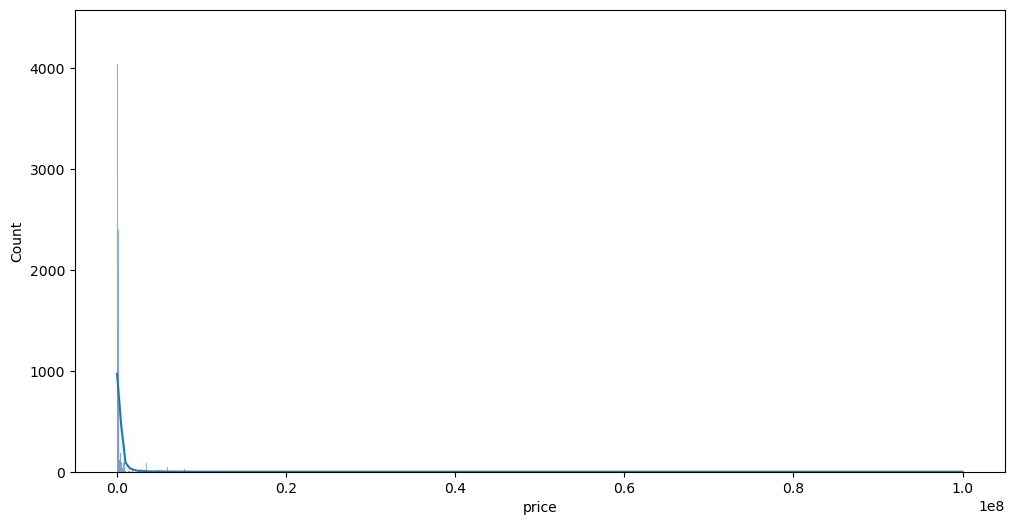

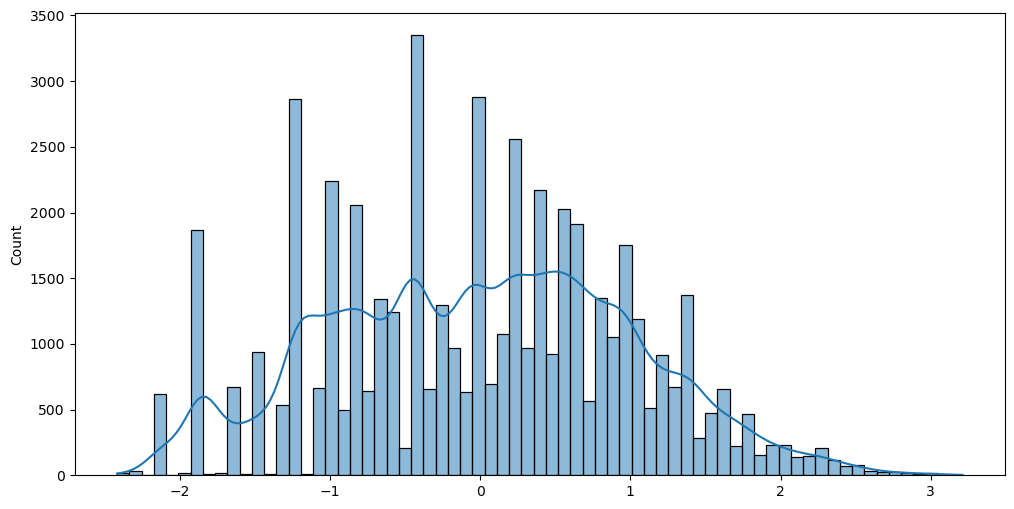

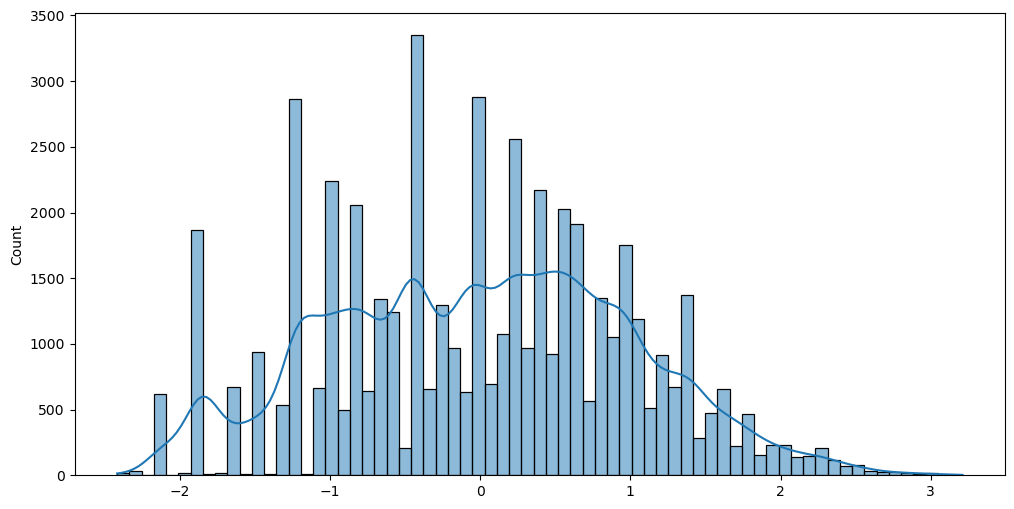

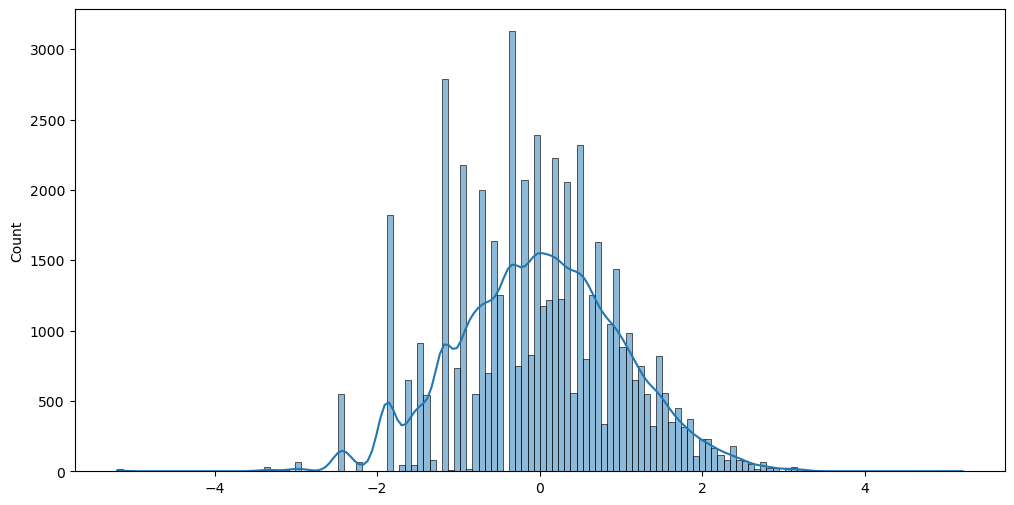

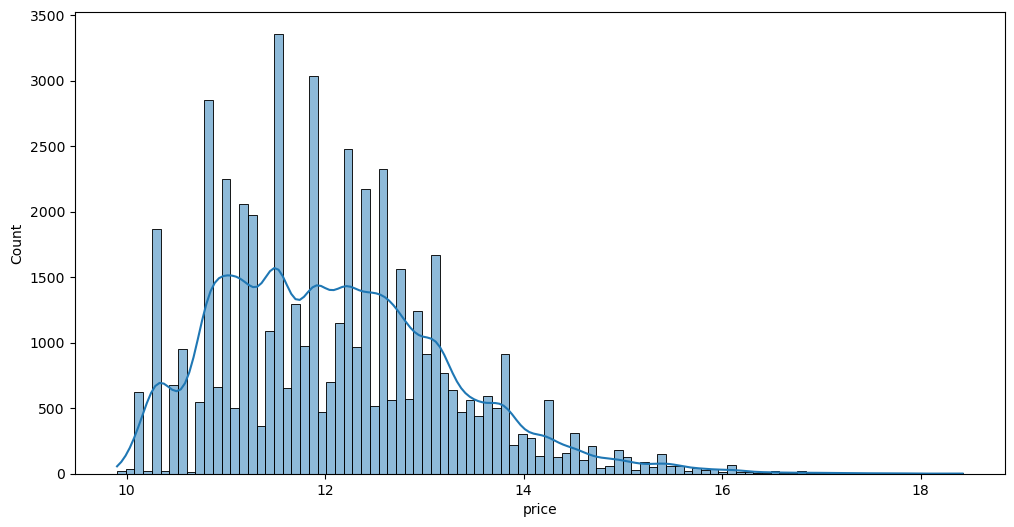

In [5]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x=df['price'],
    kde=True,
)

_, p_value = stats.shapiro(df['price'])
print(f"Before: p-value = {p_value:}")

from sklearn.preprocessing import PowerTransformer

transformers = {
    "Box-Cox": PowerTransformer(method="box-cox"),
    "Yeo-Johnson": PowerTransformer(method="yeo-johnson"),
    "Quantile": QuantileTransformer(output_distribution='normal')
}

for name, transformer in transformers.items():
    transformed = transformer.fit_transform(df[['price']])
    _, p_value = stats.shapiro(transformed.flatten())
    plt.figure(figsize=(12, 6))
    sns.histplot(
            data=df,
            x=transformed.flatten(),
            kde=True)
    plt.plot()
    print(f"{name}: p-value = {p_value}")
    df[f'price_{name}'] = transformed.flatten()

transformed = df['price'].apply(np.log1p)
_, p_value = stats.shapiro(transformed)
plt.figure(figsize=(12, 6))
sns.histplot(
        data=df,
        x=transformed,
        kde=True)
plt.plot()
print(f"logarithm: p-value = {p_value}")

df['price_log'] = df['price'].apply(np.log1p)

As we could see how much transformation help us in skewnes

In [7]:
for transformed_columns in df.columns:
    if 'price_' in transformed_columns:
        display(df[transformed_columns].describe())

count    5.163500e+04
mean    -1.084907e-15
std      1.000010e+00
min     -2.416163e+00
25%     -8.203585e-01
50%     -4.290573e-02
75%      7.041052e-01
max      3.211052e+00
Name: price_Box-Cox, dtype: float64

count    5.163500e+04
mean    -2.587044e-15
std      1.000010e+00
min     -2.416143e+00
25%     -8.203610e-01
50%     -4.290661e-02
75%      7.041068e-01
max      3.211027e+00
Name: price_Yeo-Johnson, dtype: float64

count    51635.000000
mean         0.004112
std          1.009339
min         -5.199338
25%         -0.733156
50%         -0.043924
75%          0.680013
max          5.199338
Name: price_Quantile, dtype: float64

count    51635.000000
mean        12.102829
std          1.158811
min          9.903538
25%         11.156265
50%         11.918397
75%         12.793862
max         18.420681
Name: price_log, dtype: float64

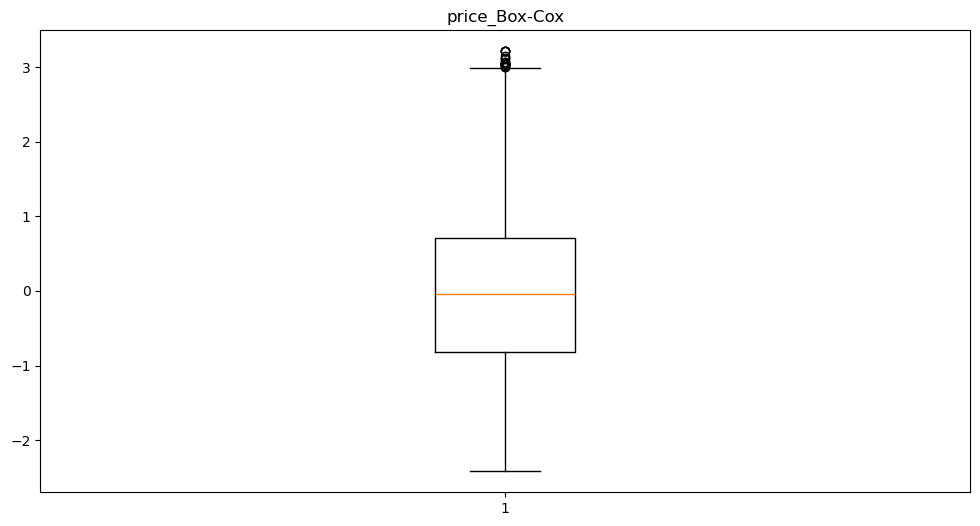

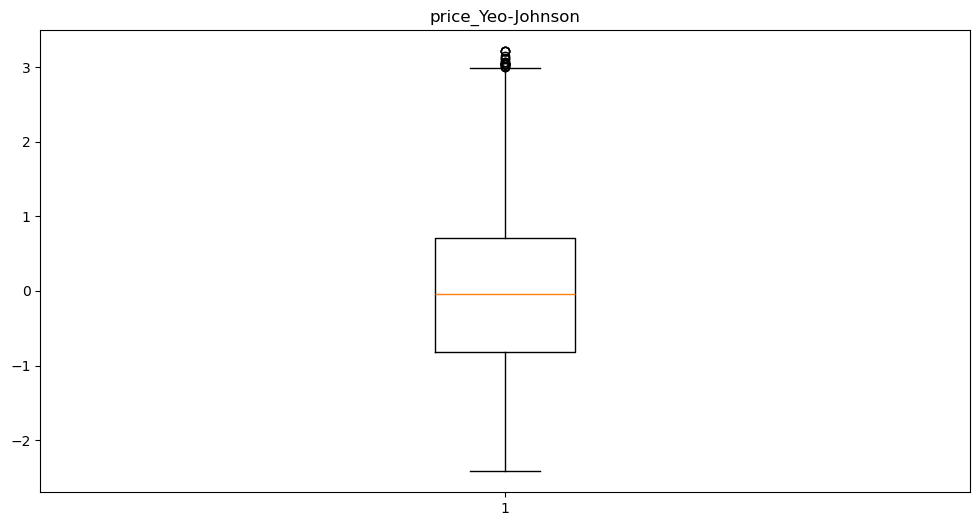

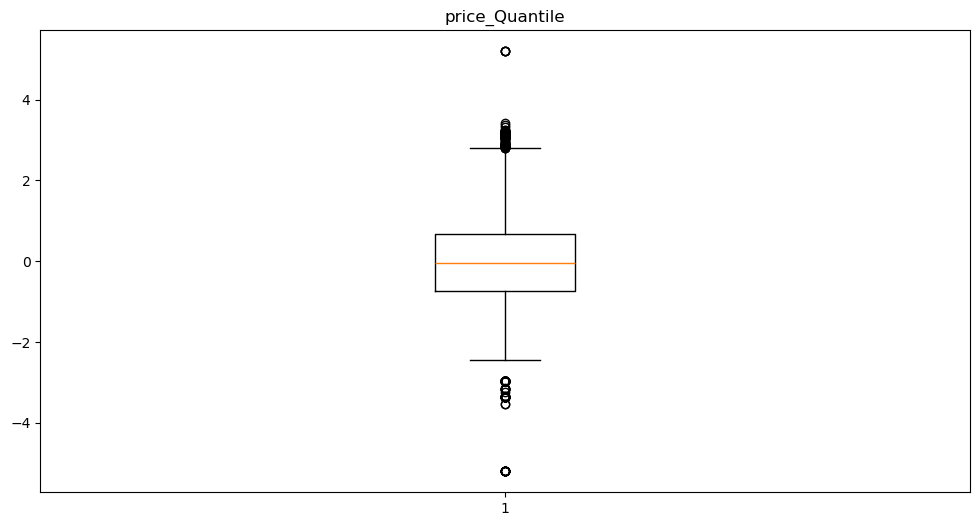

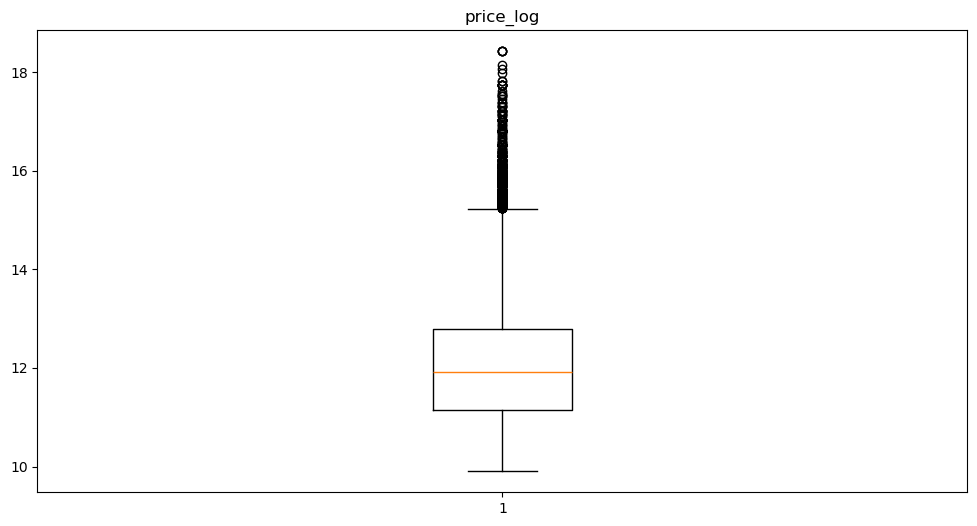

In [8]:
from matplotlib import pyplot as plt


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        plt.figure(figsize=(12, 6))
        plt.boxplot(df[transformed_column])
        plt.title(transformed_column)
        plt.plot


# Feature engineering

In [10]:
df['plate_length'] = df['plate'].str.len()

In [11]:
df['plate_length'].value_counts()

plate_length
9    36195
8    15440
Name: count, dtype: int64

In [12]:
df.groupby('plate_length').describe().T

plate_length                        8             9
price             count  1.544000e+04  3.619500e+04
                  mean   8.006511e+05  3.050210e+05
                  std    2.813470e+06  1.066669e+06
                  min    2.000000e+04  2.000000e+04
                  25%    1.200000e+05  6.500000e+04
                  50%    2.900000e+05  1.300000e+05
                  75%    6.000000e+05  2.900000e+05
                  max    1.000000e+08  1.000000e+08
price_Box-Cox     count  1.544000e+04  3.619500e+04
                  mean   4.239626e-01 -1.808532e-01
                  std    9.817824e-01  9.518769e-01
                  min   -2.416163e+00 -2.416163e+00
                  25%   -2.572868e-01 -9.030939e-01
                  50%    5.326772e-01 -1.791821e-01
                  75%    1.078332e+00  5.326772e-01
                  max    3.211052e+00  3.211052e+00
price_Yeo-Johnson count  1.544000e+04  3.619500e+04
                  mean   4.239627e-01 -1.808533e-01
                  std    9.817822e-01  9.518770e-01
                  min   -2.416143e+00 -2.416143e+00
                  25%   -2.572884e-01 -9.030964e-01
                  50%    5.326783e-01 -1.791835e-01
                  75%    1.078334e+00  5.326783e-01
                  max    3.211027e+00  3.211027e+00
price_Quantile    count  1.544000e+04  3.619500e+04
                  mean   4.270613e-01 -1.763093e-01
                  std    9.993341e-01  9.583845e-01
                  min   -5.199338e+00 -5.199338e+00
                  25%   -2.252024e-01 -8.179015e-01
                  50%    4.682027e-01 -1.663673e-01
                  75%    1.081940e+00  4.682027e-01
                  max    5.199338e+00  5.199338e+00
price_log         count  1.544000e+04  3.619500e+04
                  mean   1.260510e+01  1.188857e+01
                  std    1.236115e+00  1.053746e+00
                  min    9.903538e+00  9.903538e+00
                  25%    1.169526e+01  1.108216e+01
                  50%    1.257764e+01  1.177530e+01
                  75%    1.330469e+01  1.257764e+01
                  max    1.842068e+01  1.842068e+01

In [13]:
# Split region and registration code from the plate

df['region'] = df['plate'].apply(lambda x: x[-2:] if len(x) == 8 else x[-3:])
df['registration_code'] = df['plate'].apply(lambda x: x[1:4])
df['series_part_1'] = df['plate'].apply(lambda x: x[0])
df['series_part_2'] = df['plate'].apply(lambda x: x[4:6])
df['series'] = df['plate'].apply(lambda x: x[0] + x[4:6])

In [14]:
# get the mean price for each duplicate plate (I see some of them are use the highest)
for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        df[transformed_column] = df.groupby('plate')[transformed_column].transform('mean')
        df = df.drop_duplicates(subset='plate').reset_index(drop=True)

display(df.describe())

,price,price_Box-Cox,price_Yeo-Johnson,price_Quantile,price_log,plate_length
count,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000
mean,4.362646e+05,-0.065270,-0.066429,-0.060615,12.031245,8.695723
std,1.842495e+06,1.006180,1.007075,1.017185,1.160217,0.460106
min,2.000000e+04,-2.416163,-2.416143,-5.199338,9.903538,8.000000
25%,7.000000e+04,-0.820359,-0.820361,-0.733156,11.156265,8.000000
50%,1.500000e+05,-0.042906,-0.042907,-0.043924,11.918397,9.000000
75%,3.500000e+05,0.682227,0.682228,0.637923,12.765691,9.000000
max,1.000000e+08,3.211052,3.211027,5.199338,18.420681,9.000000


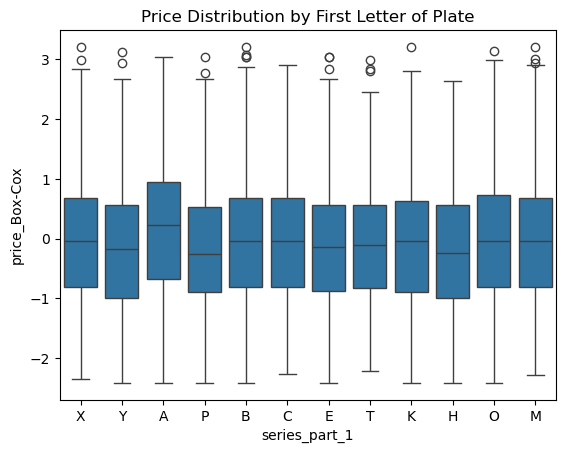

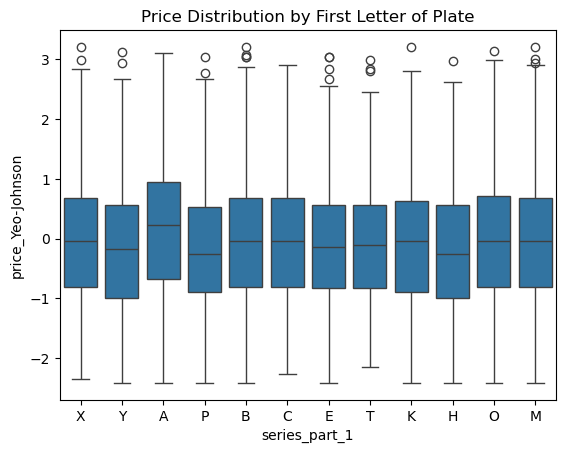

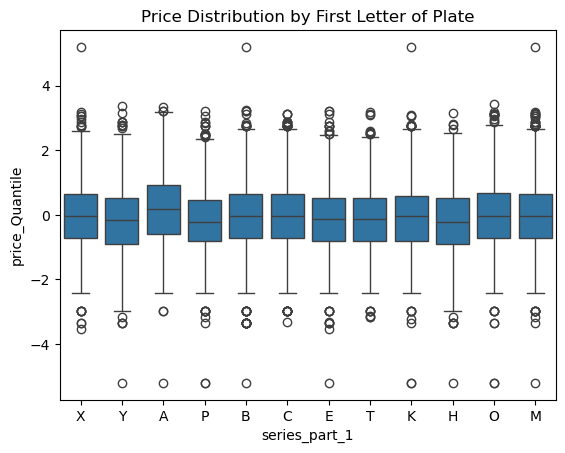

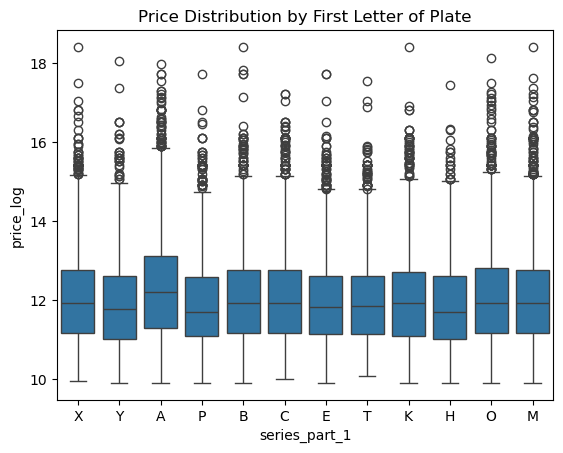

In [15]:
# findout whether the first letter is important or not 

# df.groupby('digit_1').describe()['price']


import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        data = pd.concat((df['series_part_1'], df[transformed_column]), axis=1)
        
        sns.boxplot(x='series_part_1', y=transformed_column, data=data)
        plt.title('Price Distribution by First Letter of Plate')
        plt.show()

In [16]:
import pandas as pd
import scipy.stats as stats


for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        data = pd.concat((df['series_part_1'], df[transformed_column]), axis=1)
        
        
        groups = [group[transformed_column].values for _, group in data.groupby("series_part_1")]
        
        h_stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis H-statistic for {transformed_column}: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic for price_Box-Cox: 412.8869483660781, p-value: 1.1220460482795856e-81
Kruskal-Wallis H-statistic for price_Yeo-Johnson: 414.0548292174624, p-value: 6.337262546752986e-82
Kruskal-Wallis H-statistic for price_Quantile: 414.0548292174624, p-value: 6.337262546752986e-82
Kruskal-Wallis H-statistic for price_log: 414.0548292174624, p-value: 6.337262546752986e-82


as we see we have more monotonic correlation instead of linear.

In [18]:
from supplemental_english import REGION_CODES

def get_region_code(plate):
    region_code = str(int(plate[6:]))
    for region, codes in REGION_CODES.items():
        if region_code in codes:
            return region
    return "Unknown"

In [19]:
df['region_name'] = df["plate"].apply(get_region_code).astype(str)

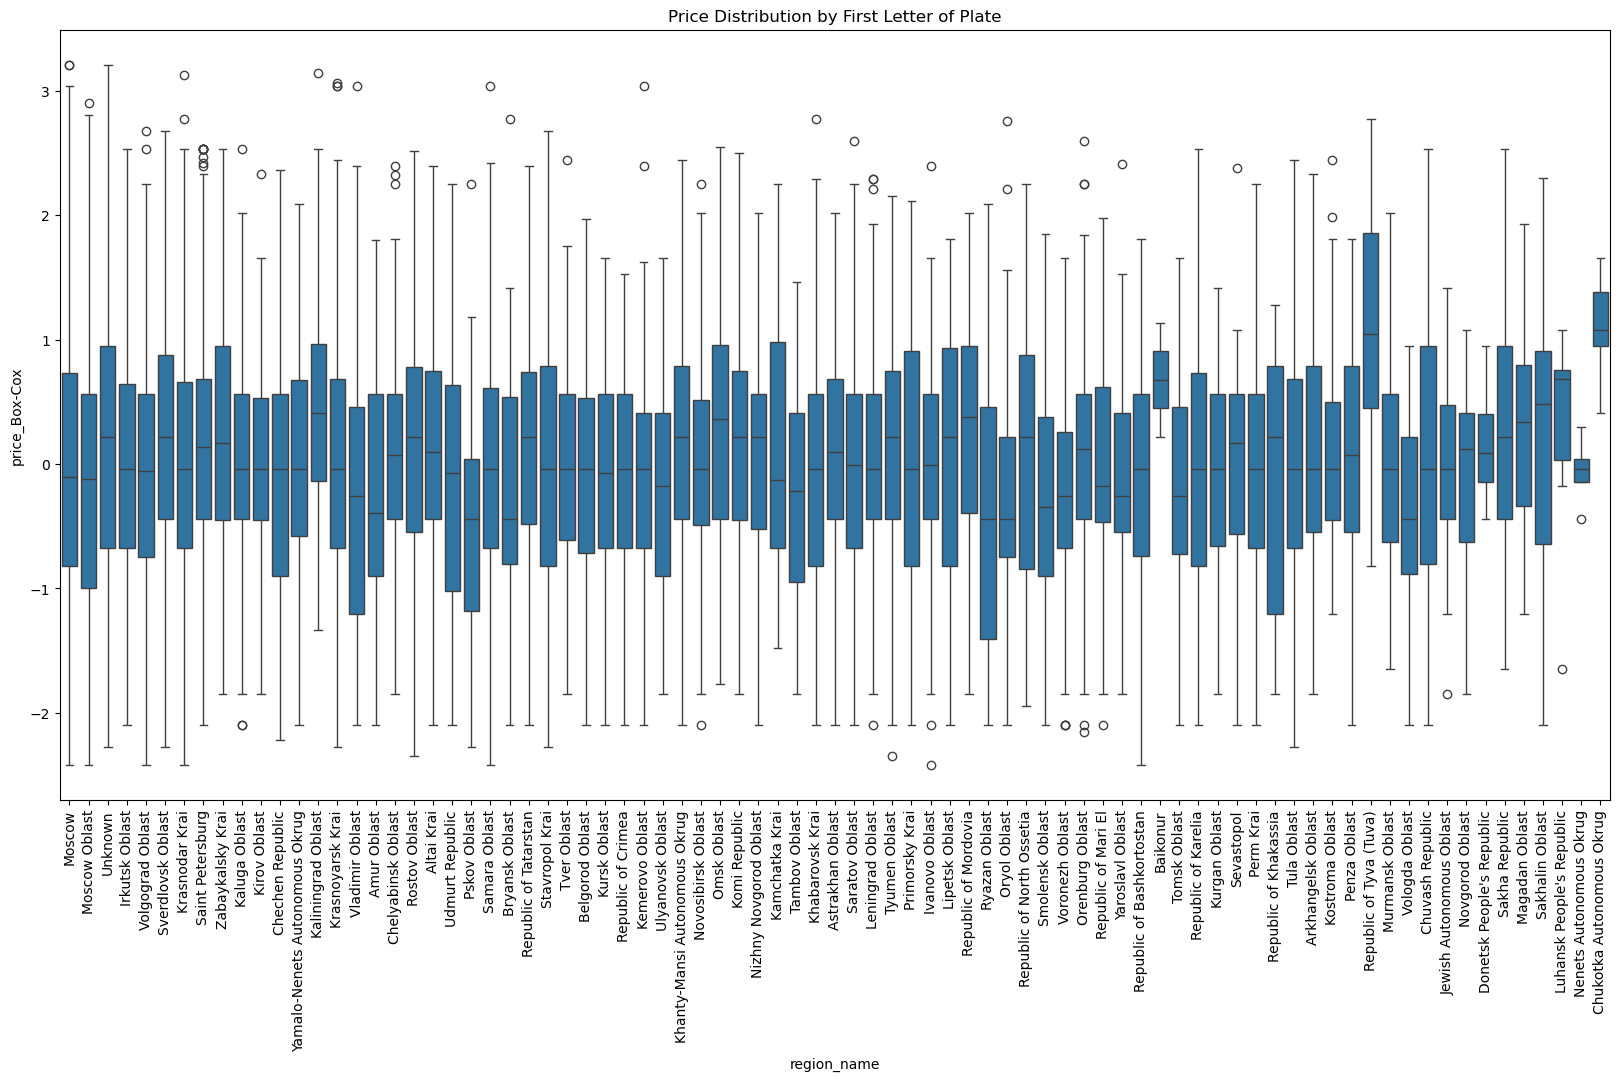

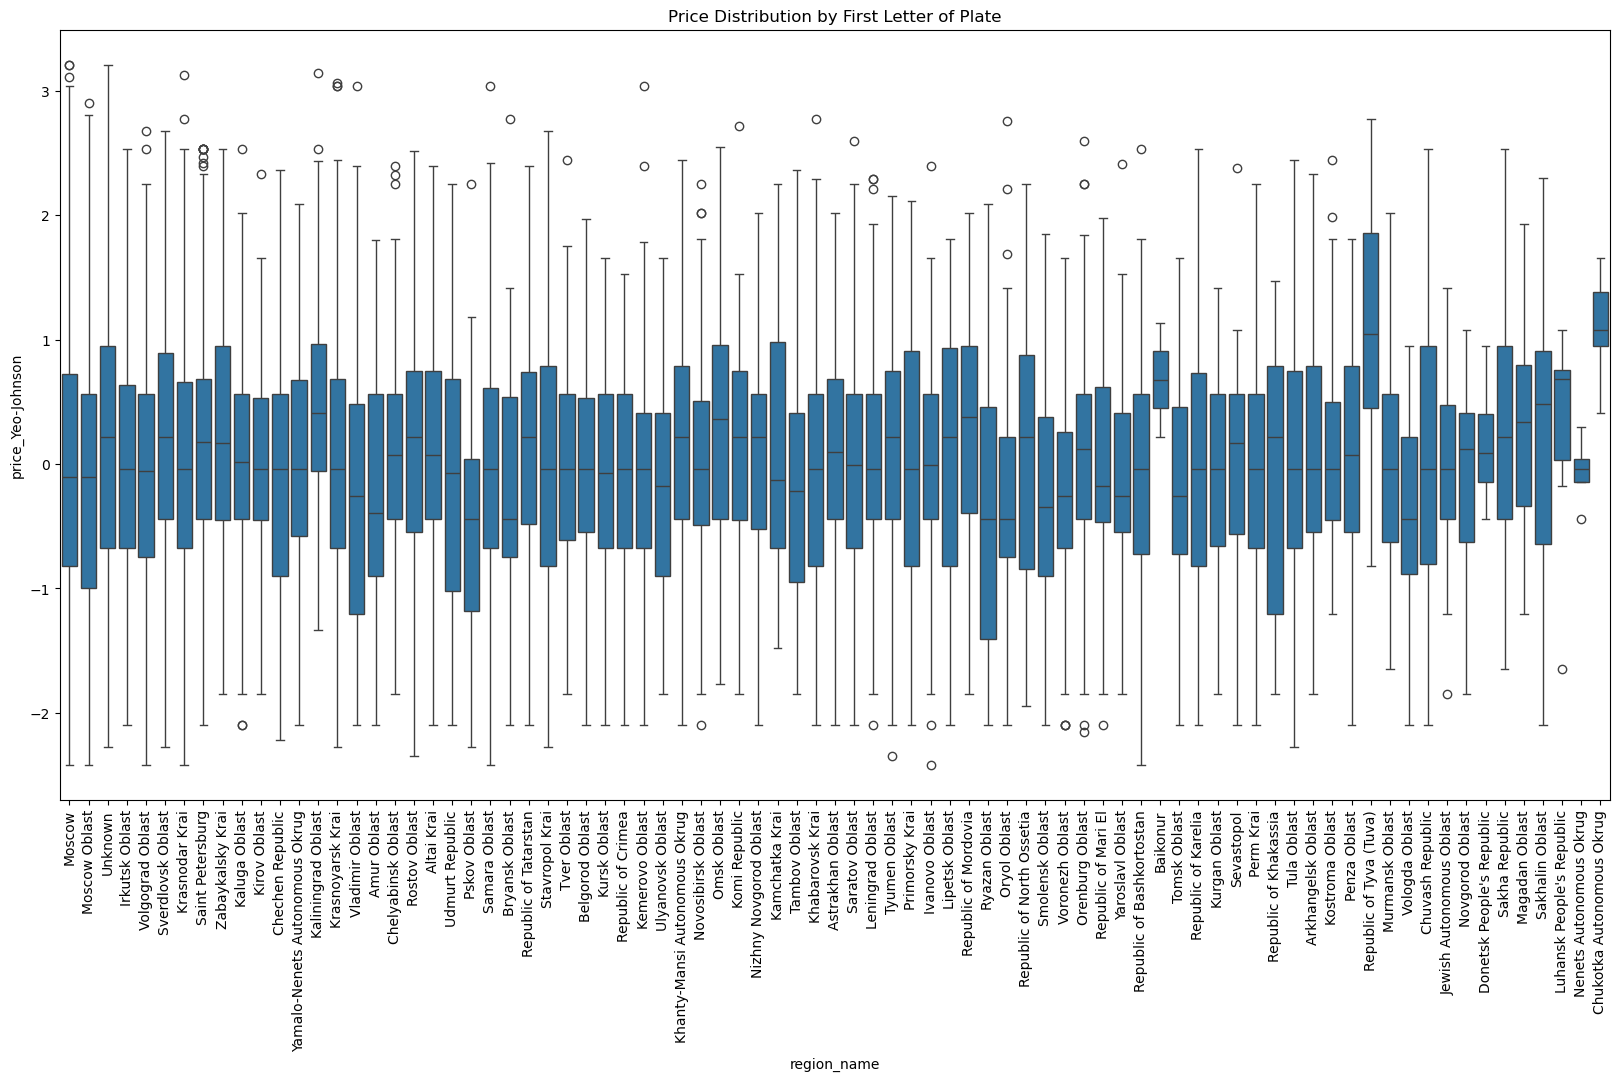

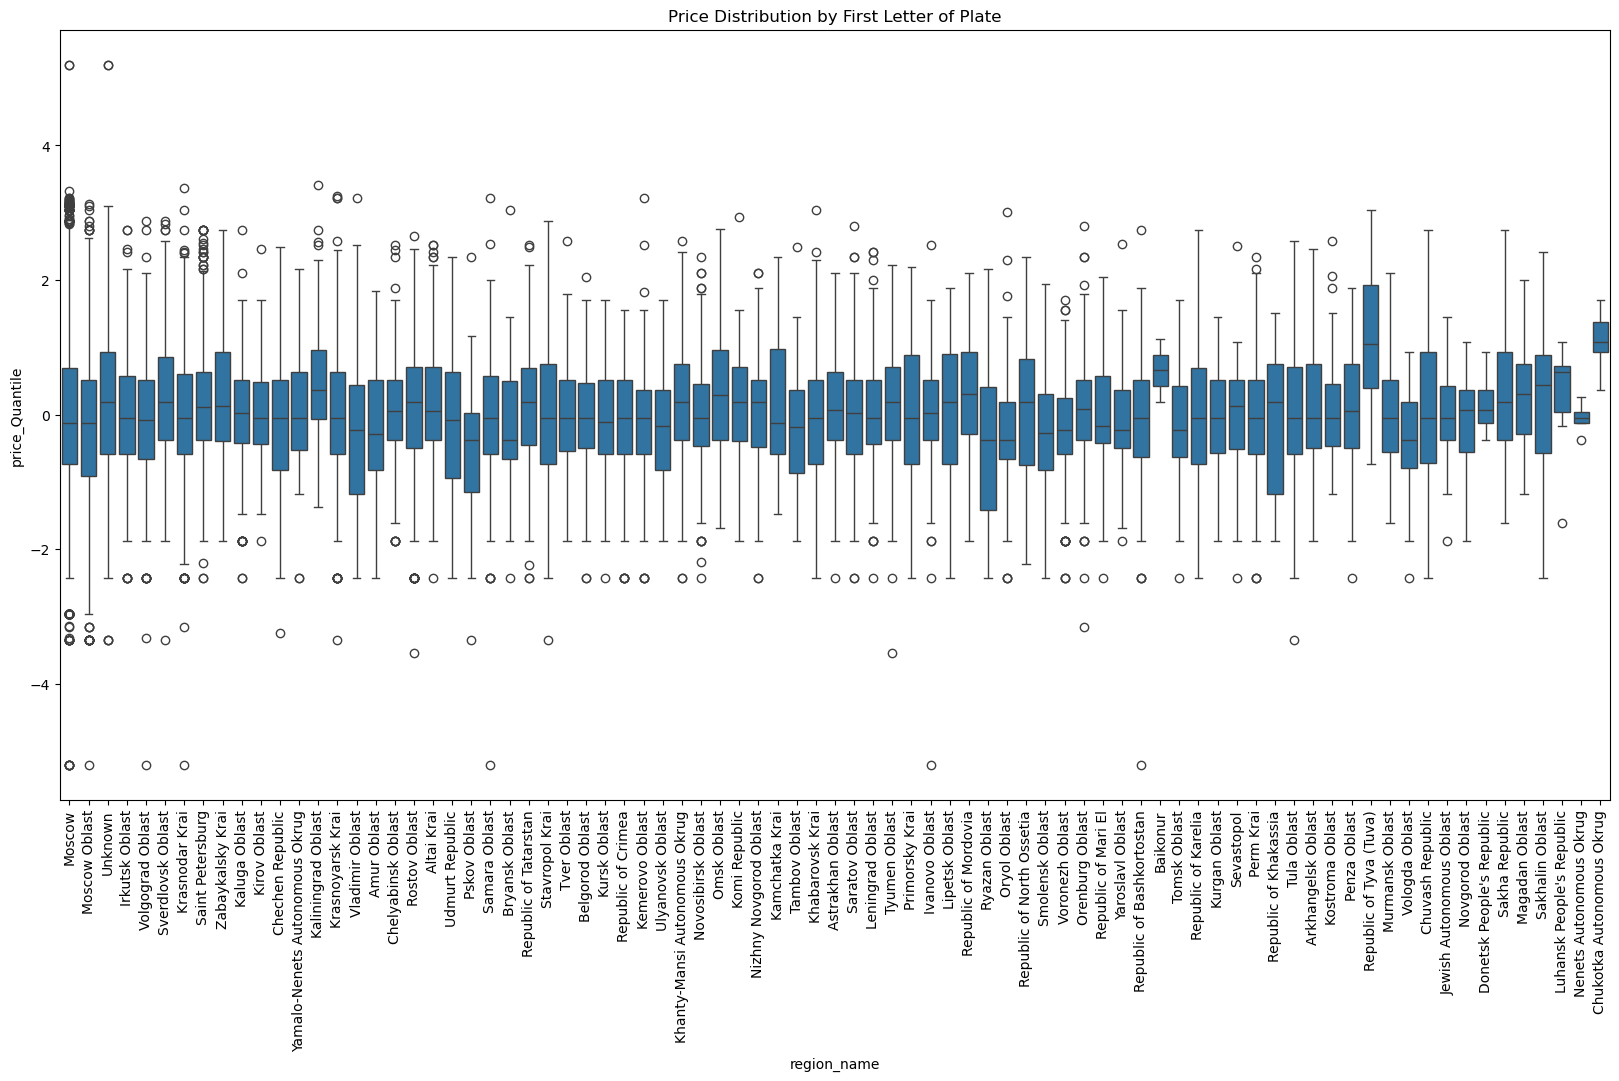

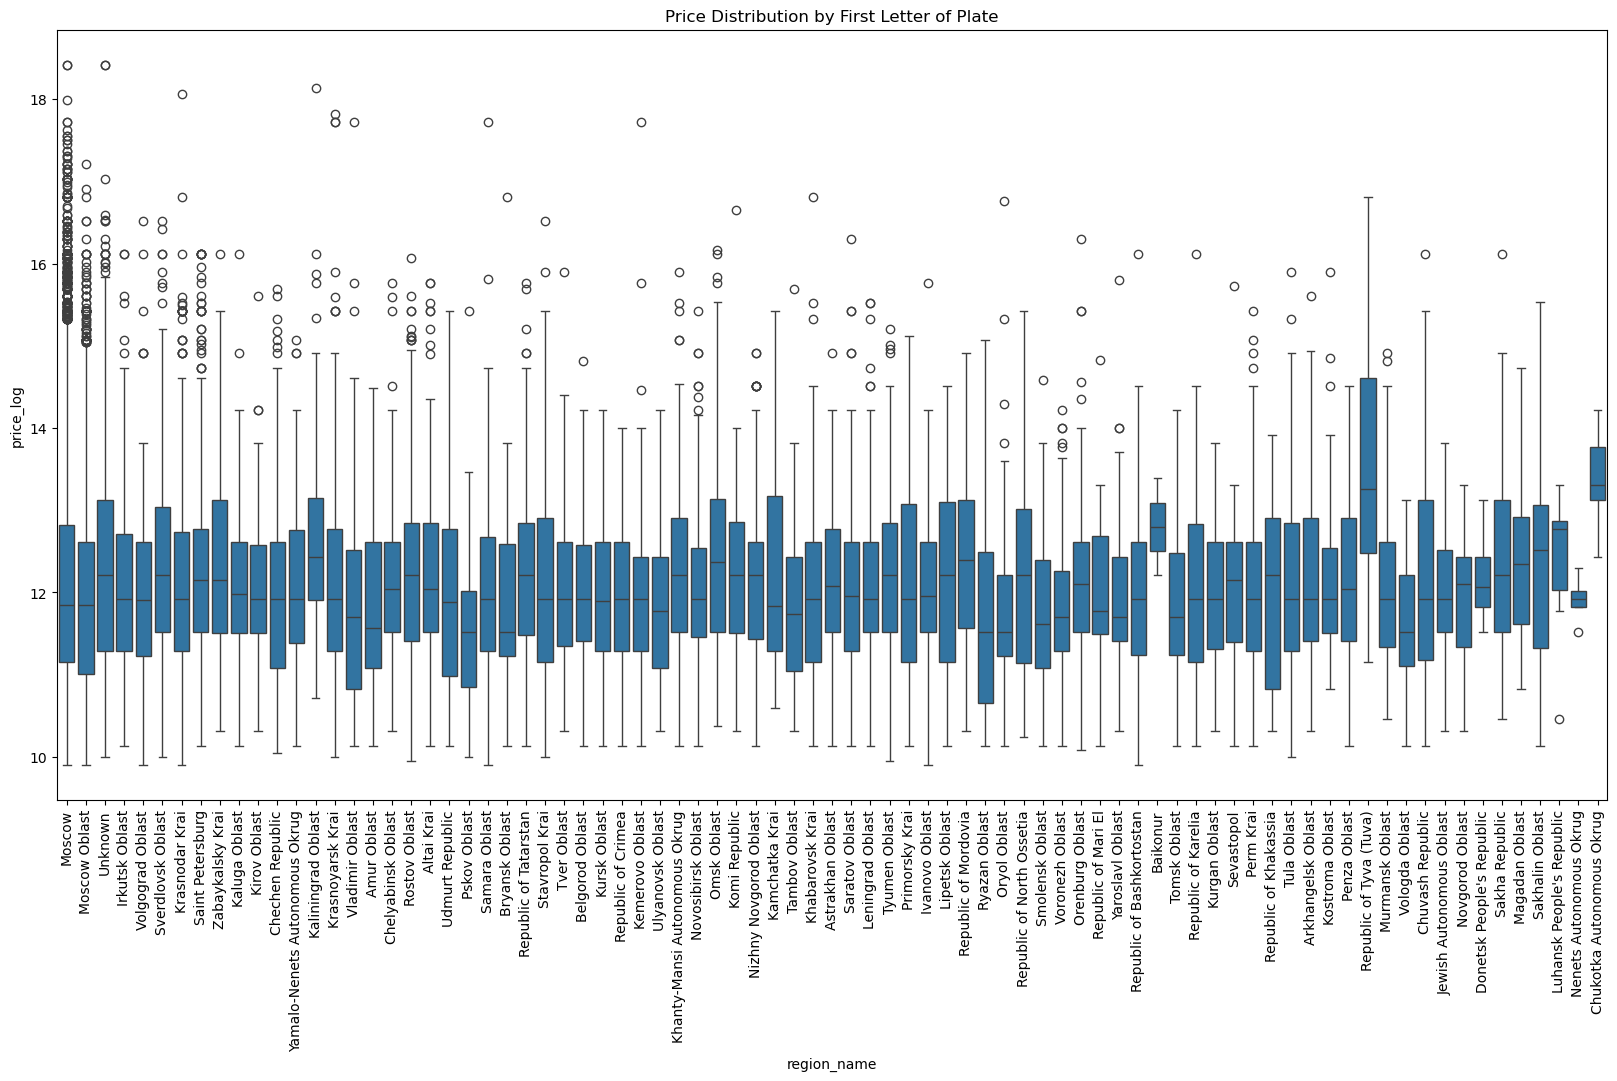

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column:         
        plt.figure(figsize=(20,10))
        sns.boxplot(x='region_name', y=transformed_column, data=df)
        plt.xticks(rotation=90)
        plt.title('Price Distribution by First Letter of Plate')
        plt.show()

In [21]:
region_order = df.groupby('region_name')['price'].mean().sort_values(ascending=True).index

region_mapping = {region: idx for idx, region in enumerate(region_order)}

df['region_id_normal'] = df['region_name'].map(region_mapping)

for transformed_column in df.columns:
    if 'price_' in transformed_column:    
        region_order = df.groupby('region_name')['price'].mean().sort_values(ascending=True).index
        region_mapping = {region: idx for idx, region in enumerate(region_order)}
        df[f'region_id_{transformed_column.split("_")[1]}'] = df['region_name'].map(region_mapping)
        
df.describe()

,price,price_Box-Cox,price_Yeo-Johnson,price_Quantile,price_log,plate_length,region_id_normal,region_id_Box-Cox,region_id_Yeo-Johnson,region_id_Quantile,region_id_log
count,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000
mean,4.362646e+05,-0.065270,-0.066429,-0.060615,12.031245,8.695723,47.642197,47.642197,47.642197,47.642197,47.642197
std,1.842495e+06,1.006180,1.007075,1.017185,1.160217,0.460106,19.070592,19.070592,19.070592,19.070592,19.070592
min,2.000000e+04,-2.416163,-2.416143,-5.199338,9.903538,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+04,-0.820359,-0.820361,-0.733156,11.156265,8.000000,21.000000,21.000000,21.000000,21.000000,21.000000
50%,1.500000e+05,-0.042906,-0.042907,-0.043924,11.918397,9.000000,61.000000,61.000000,61.000000,61.000000,61.000000
75%,3.500000e+05,0.682227,0.682228,0.637923,12.765691,9.000000,61.000000,61.000000,61.000000,61.000000,61.000000
max,1.000000e+08,3.211052,3.211027,5.199338,18.420681,9.000000,80.000000,80.000000,80.000000,80.000000,80.000000


In [22]:
df['region_avg_price'] = df.groupby("region")["price"].transform("mean") 

for transformed_column in df.columns:
    if 'price_' in transformed_column:
        name = transformed_column.split('_')[1]
        df[f'region_avg_{name}'] = df.groupby("region")[transformed_column].transform("mean")

df.describe()

,price,price_Box-Cox,price_Yeo-Johnson,price_Quantile,price_log,plate_length,region_id_normal,region_id_Box-Cox,region_id_Yeo-Johnson,region_id_Quantile,region_id_log,region_avg_price,region_avg_Box-Cox,region_avg_Yeo-Johnson,region_avg_Quantile,region_avg_log
count,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000
mean,4.362646e+05,-0.065270,-0.066429,-0.060615,12.031245,8.695723,47.642197,47.642197,47.642197,47.642197,47.642197,4.362646e+05,-0.065270,-0.066429,-0.060615,12.031245
std,1.842495e+06,1.006180,1.007075,1.017185,1.160217,0.460106,19.070592,19.070592,19.070592,19.070592,19.070592,4.589789e+05,0.585009,0.583592,0.577603,0.660277
min,2.000000e+04,-2.416163,-2.416143,-5.199338,9.903538,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.426799e+04,-0.843524,-0.842286,-0.837858,11.177729
25%,7.000000e+04,-0.820359,-0.820361,-0.733156,11.156265,8.000000,21.000000,21.000000,21.000000,21.000000,21.000000,1.343982e+05,-0.651453,-0.651551,-0.631211,11.372634
50%,1.500000e+05,-0.042906,-0.042907,-0.043924,11.918397,9.000000,61.000000,61.000000,61.000000,61.000000,61.000000,3.236328e+05,-0.025441,-0.023904,-0.029820,12.051332
75%,3.500000e+05,0.682227,0.682228,0.637923,12.765691,9.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.311200e+05,0.474358,0.472501,0.473311,12.647330
max,1.000000e+08,3.211052,3.211027,5.199338,18.420681,9.000000,80.000000,80.000000,80.000000,80.000000,80.000000,5.500050e+07,3.066479,3.066458,3.253423,17.822853


In [23]:
def digit_symmetry(plate):
    registration = plate[1:4]
    region = plate[6:]
    nums = registration + region

    return int(nums == nums[::-1])

df['digit_symmetry'] = df['plate'].apply(digit_symmetry)

In [24]:
df['registration_symmetry'] = df['registration_code'].apply(lambda x: int(x == x[::-1]))

In [25]:
df['region_symmetry'] = df['region'].apply(lambda x: int(x == x[::-1]))

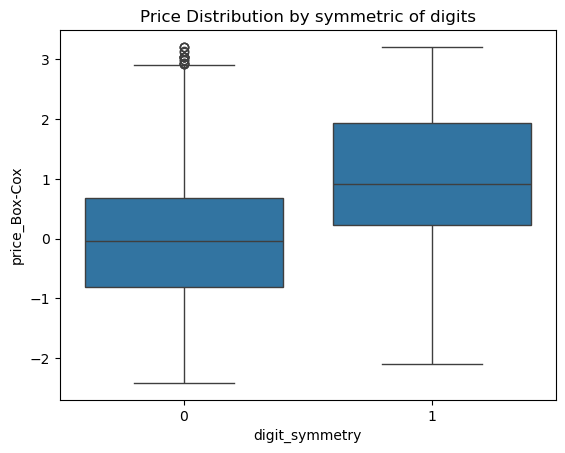

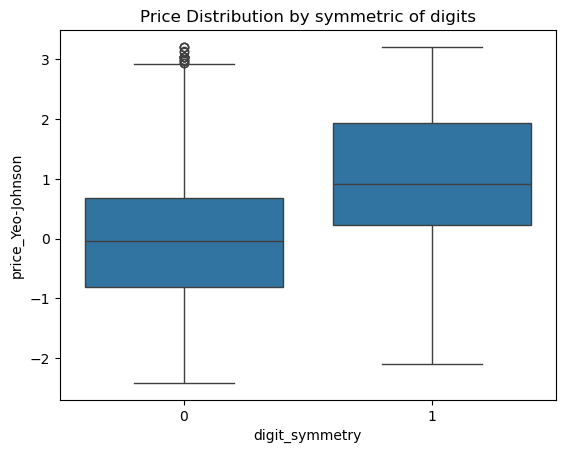

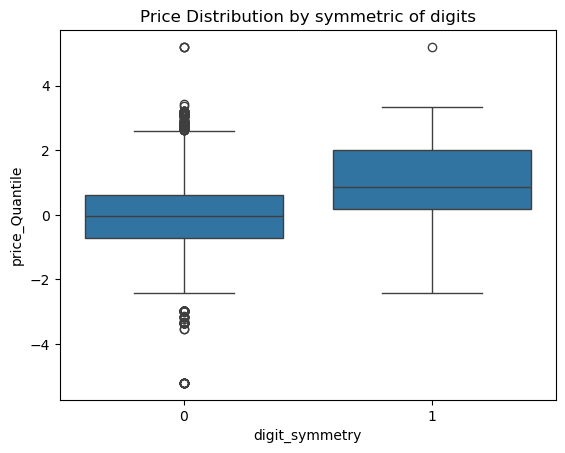

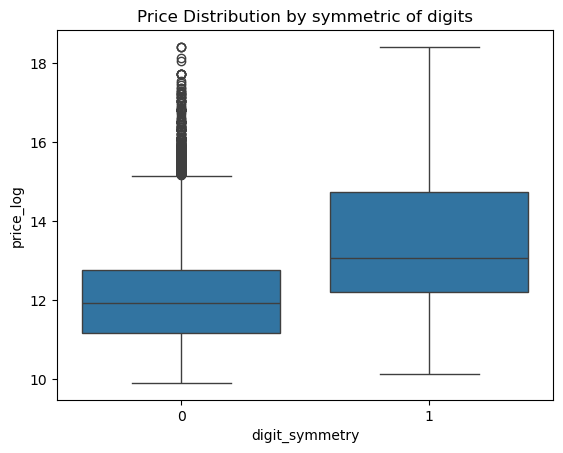

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        sns.boxplot(x='digit_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of digits')
        plt.show()

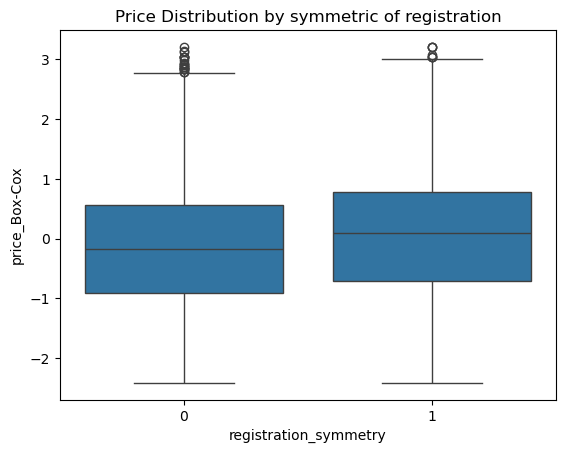

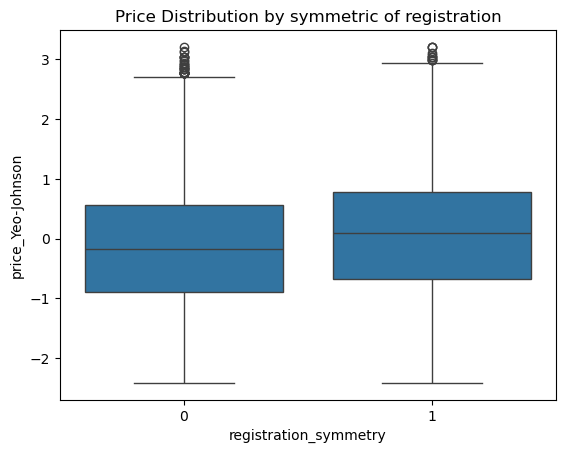

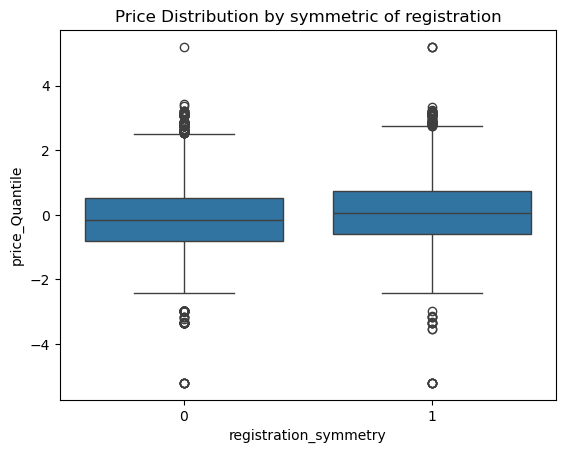

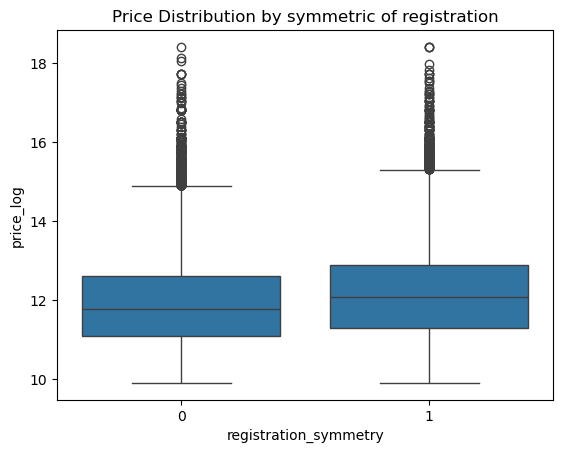

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='registration_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of registration')
        plt.show()

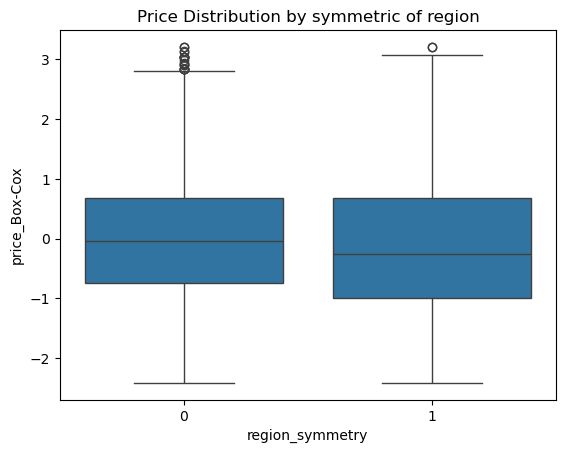

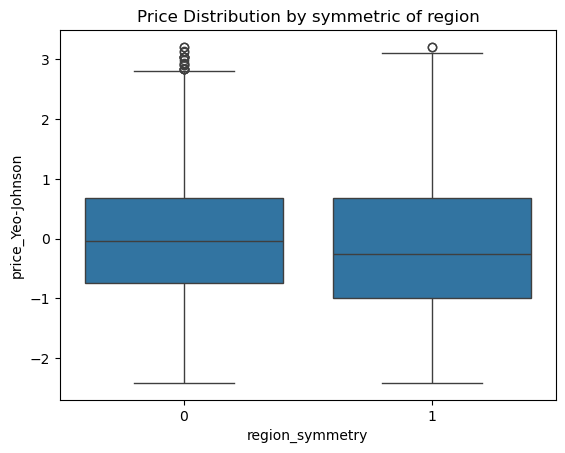

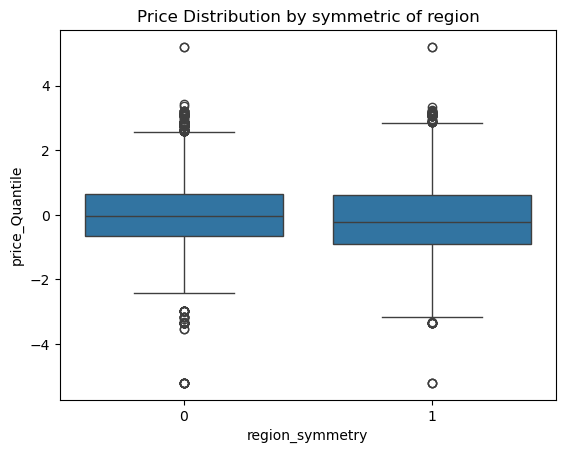

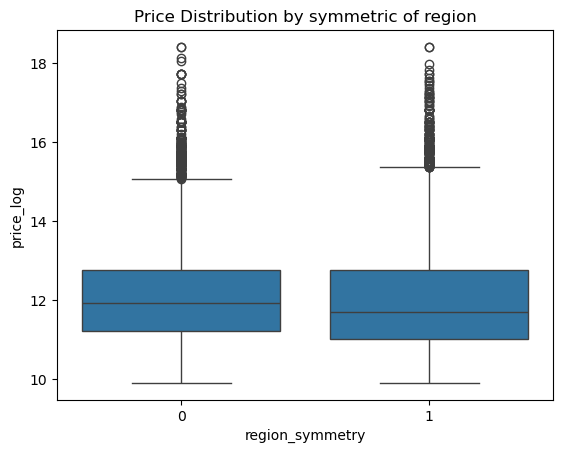

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='region_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of region')
        plt.show()

In [29]:
from collections import Counter


def frequency_score(num_str):
    counts = Counter(num_str)
    max_freq = max(counts.values())
    return round(max_freq / len(num_str), 2)

def frequency_score_plate(plate):
    registration = plate[1:4]
    region = plate[6:]
    digits = registration + region
    
    counts = Counter(digits)
    max_freq = max(counts.values())
    return round(max_freq / len(digits), 2)

In [30]:
df['digits_frequency'] = df['plate'].apply(frequency_score_plate)
df['region_frequency'] = df['region'].apply(frequency_score)
df['registration_frequency'] = df['registration_code'].apply(frequency_score) 

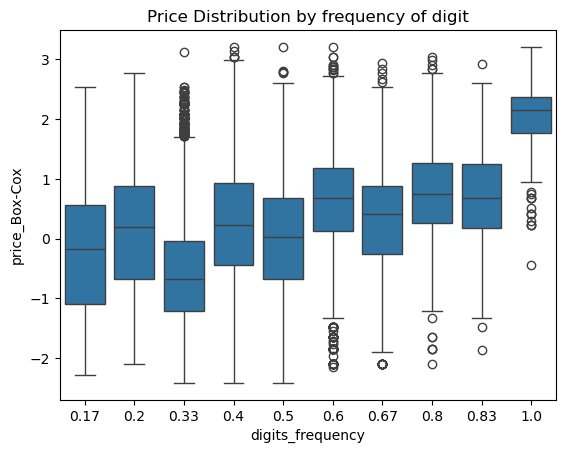

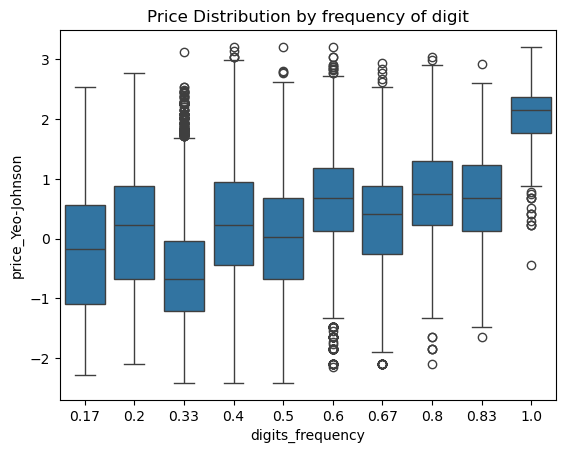

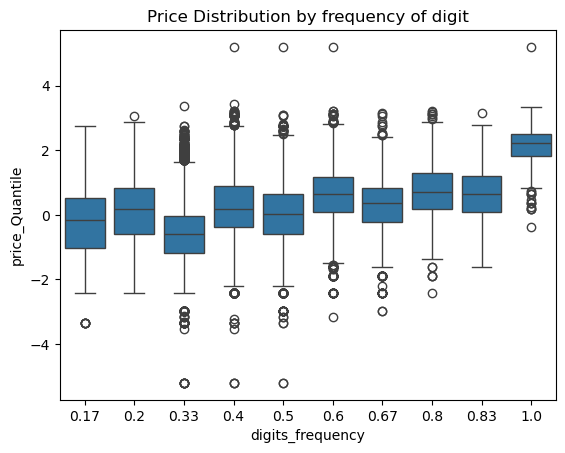

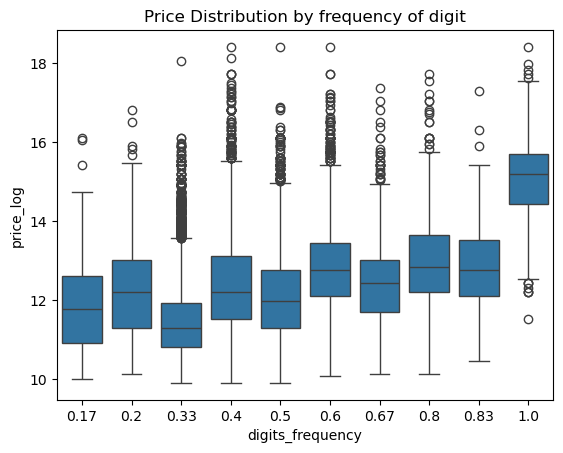

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='digits_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of digit')
        
        plt.show()

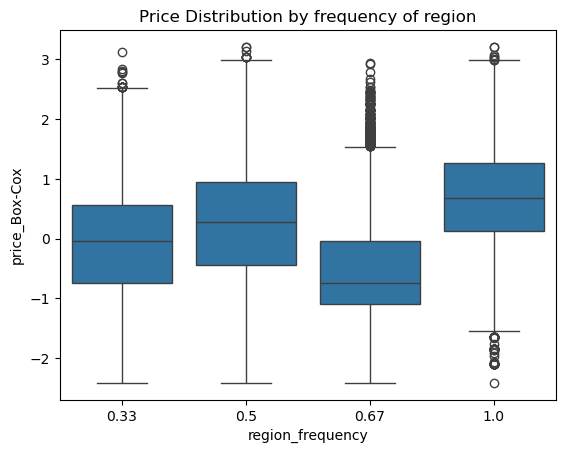

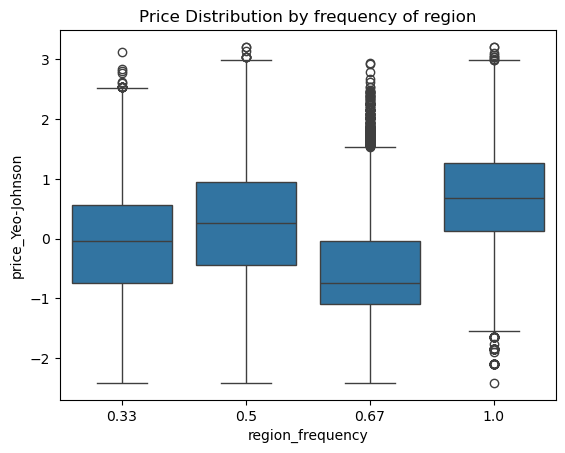

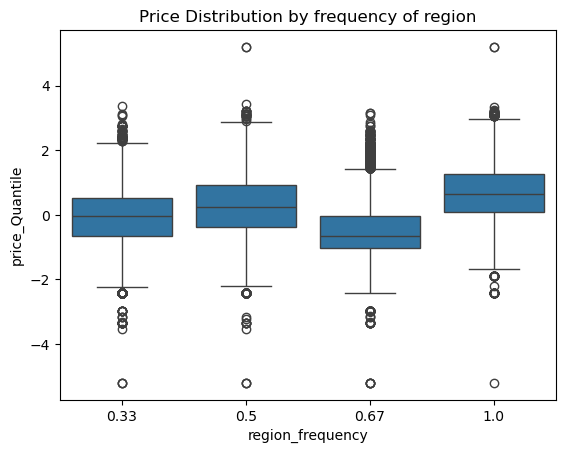

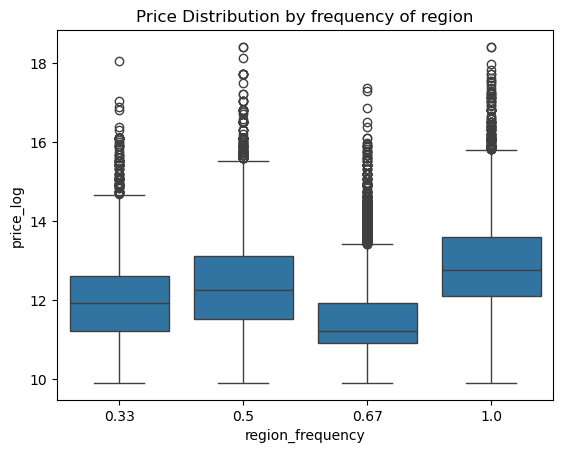

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='region_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of region')
        
        plt.show()

In [33]:
df['registration_frequency'].describe()

count    43605.000000
mean         0.624209
std          0.216875
min          0.330000
25%          0.330000
50%          0.670000
75%          0.670000
max          1.000000
Name: registration_frequency, dtype: float64

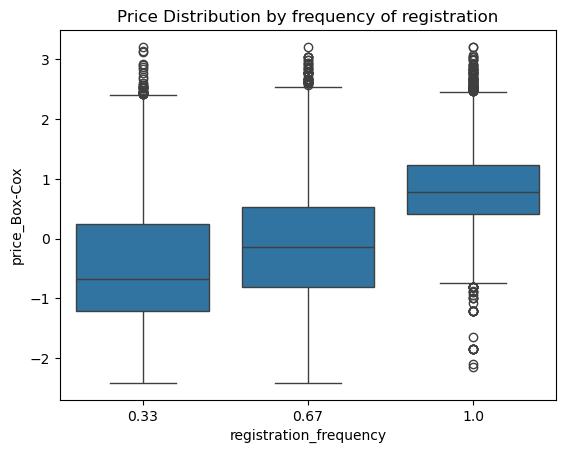

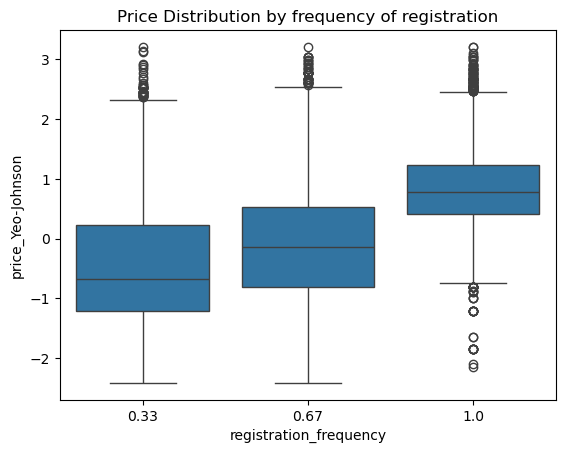

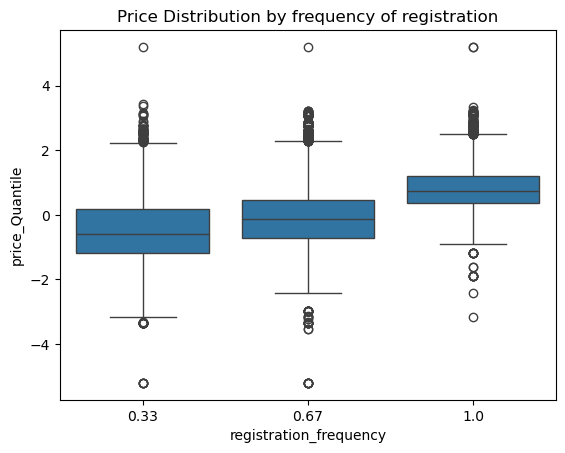

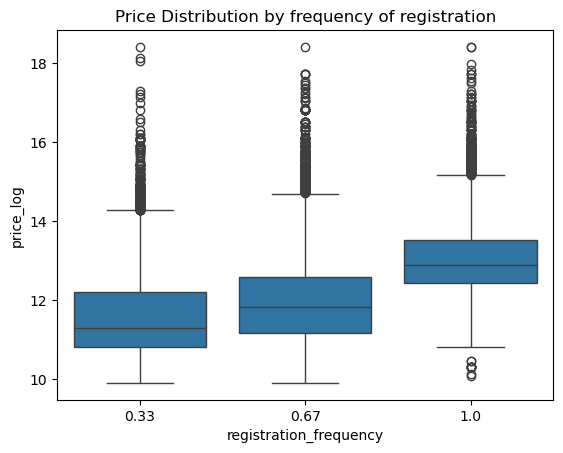

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='registration_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

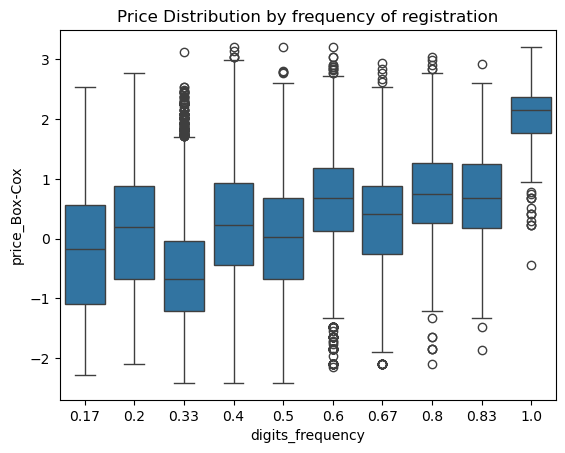

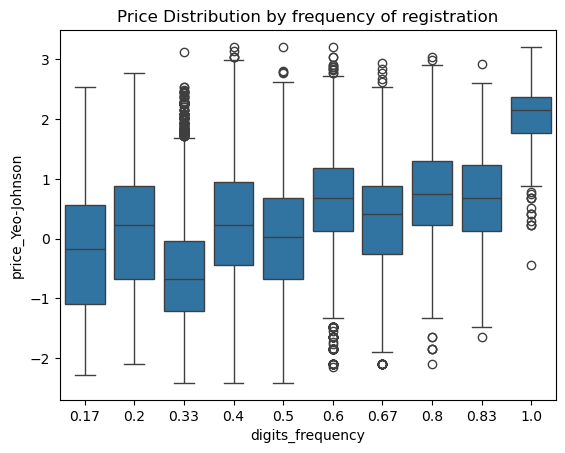

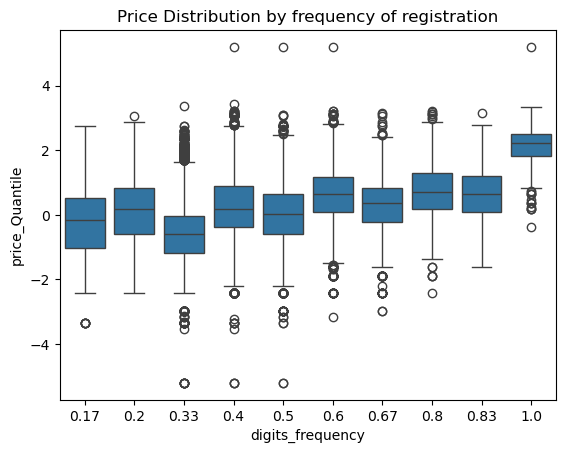

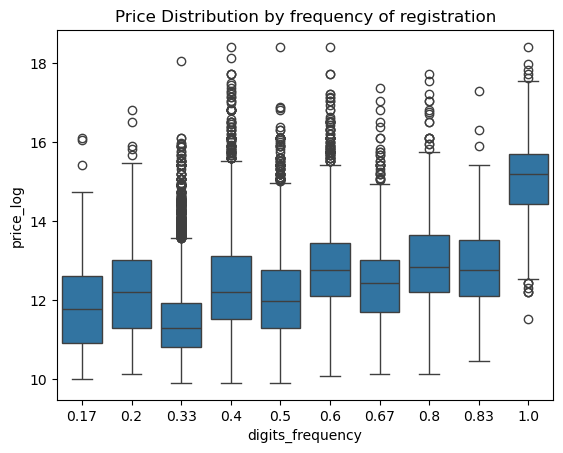

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



for transformed_column in df.columns:
    if 'price_' in transformed_column:         
        sns.boxplot(x='digits_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

In [39]:
df['series_symmetry'] = df['series'].apply(lambda x: int(x == x[::-1]))

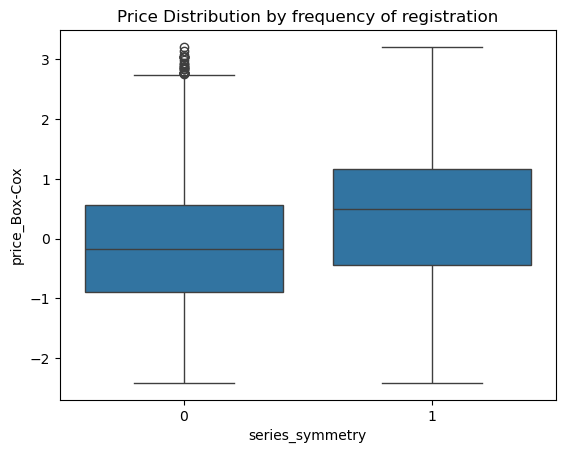

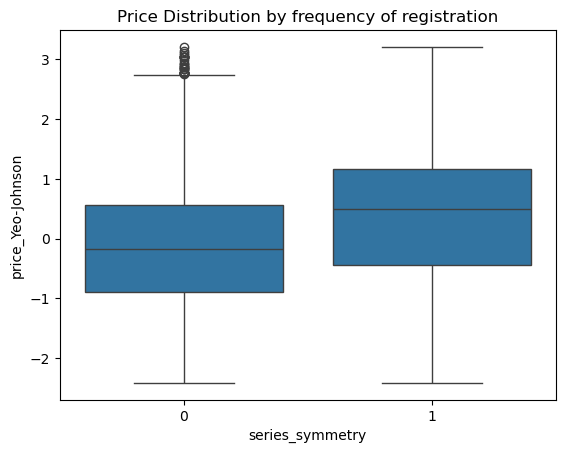

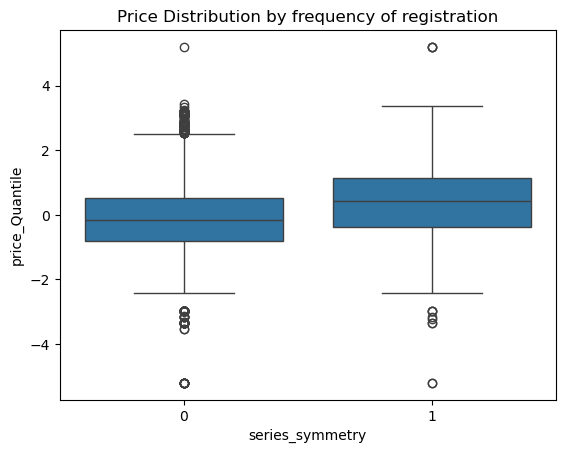

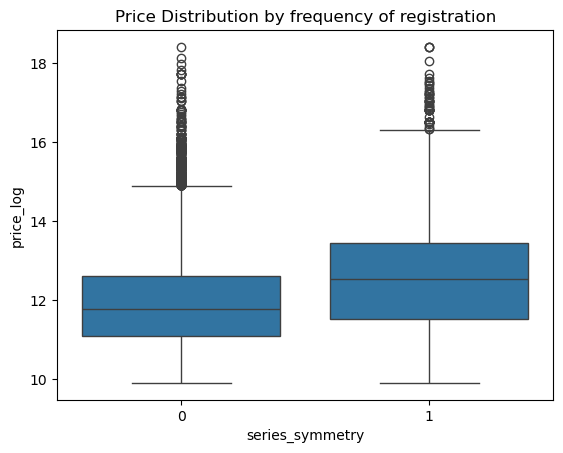

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        sns.boxplot(x='series_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

In [41]:
import pandas as pd
import scipy.stats as stats


for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        groups = [group[transformed_column].values for _, group in df.groupby("series_symmetry")]
        
        h_stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis H-statistic for {transformed_column}: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic for price_Box-Cox: 1801.8665978004367, p-value: 0.0
Kruskal-Wallis H-statistic for price_Yeo-Johnson: 1789.8088894380505, p-value: 0.0
Kruskal-Wallis H-statistic for price_Quantile: 1789.8088894380505, p-value: 0.0
Kruskal-Wallis H-statistic for price_log: 1789.8088894380505, p-value: 0.0


In [42]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

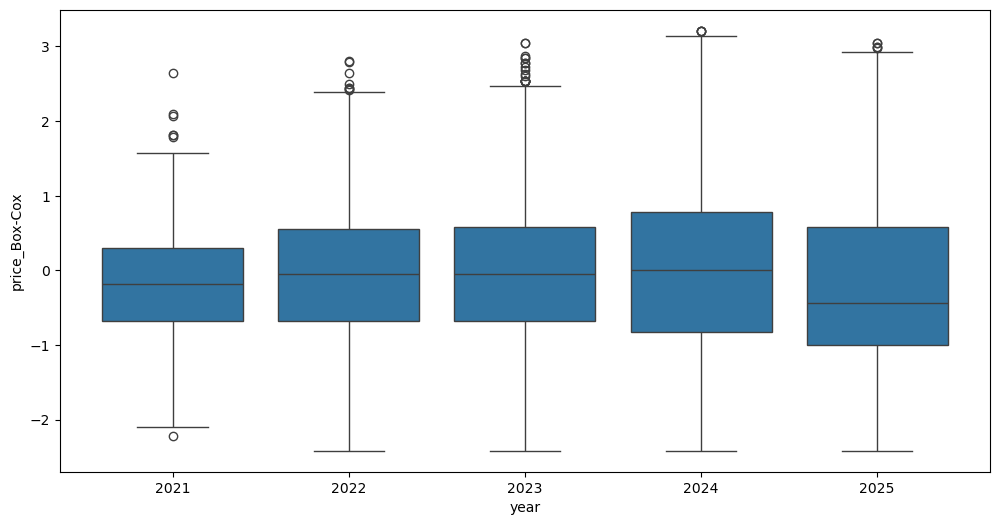

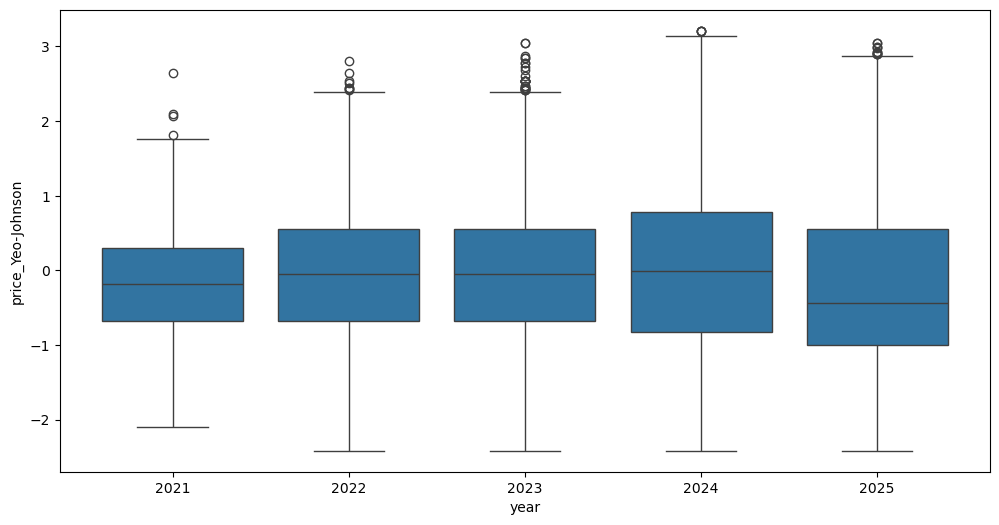

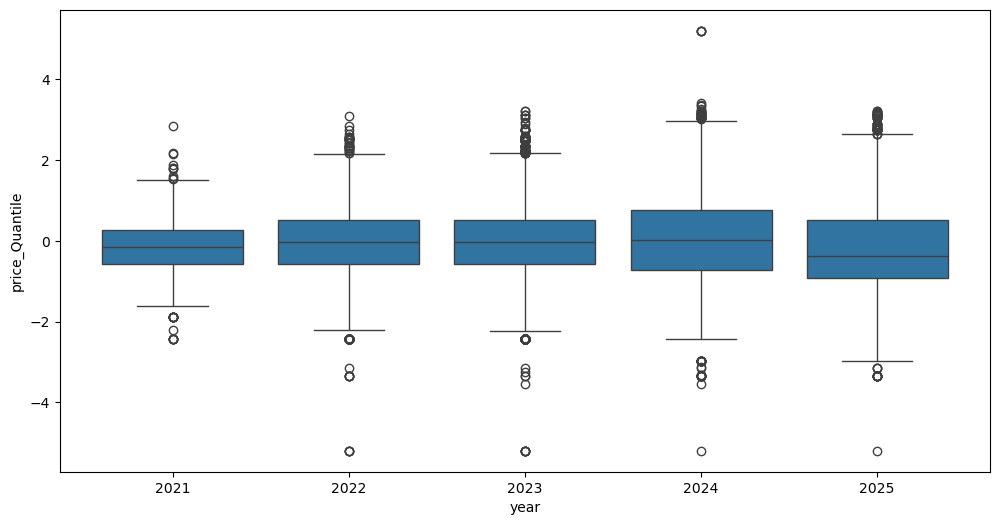

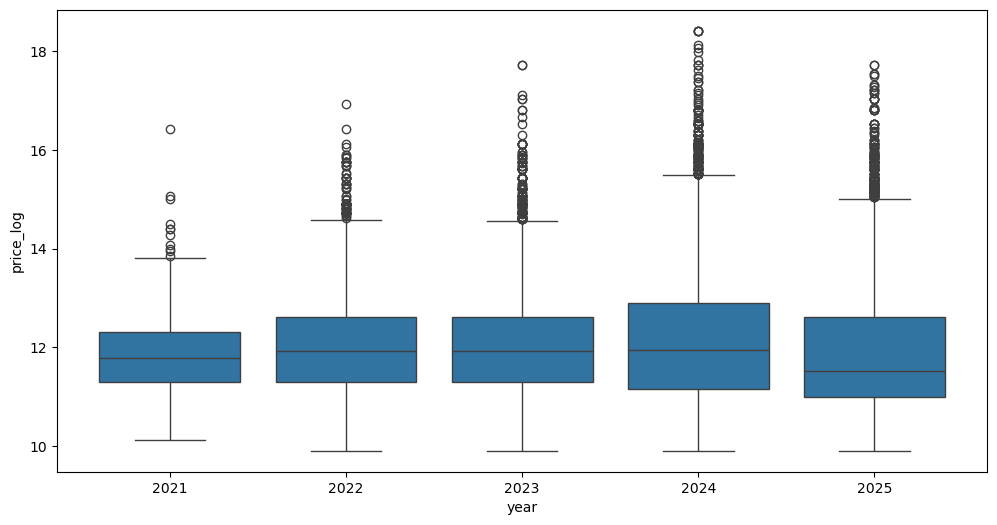

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt



for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=df,
            x='year',
            y=transformed_column
        )
        plt.plot()

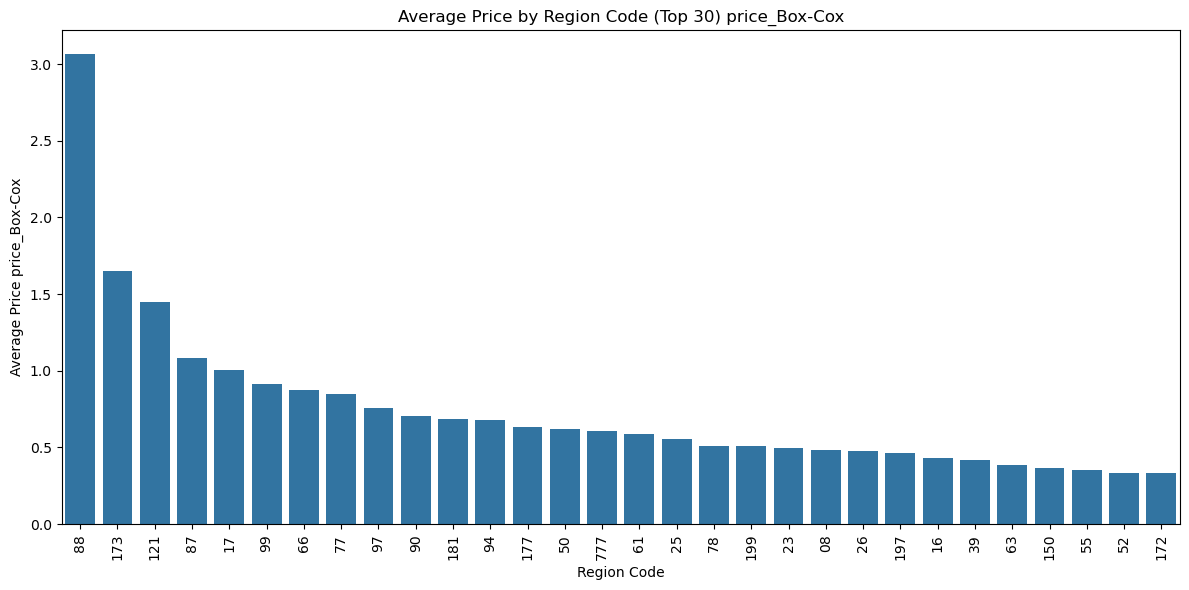

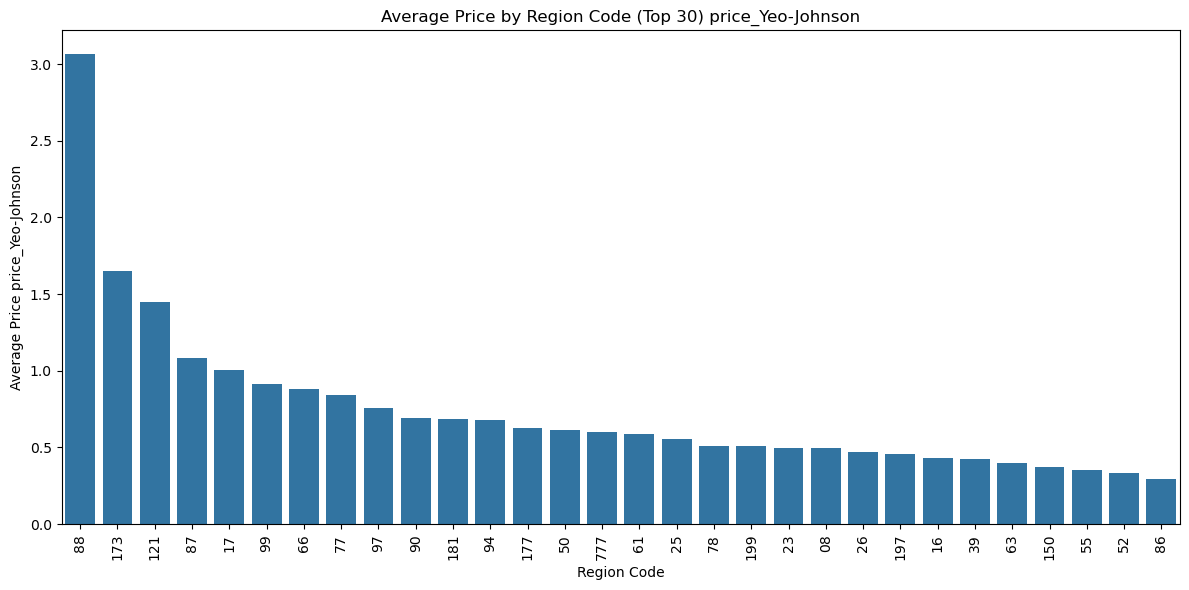

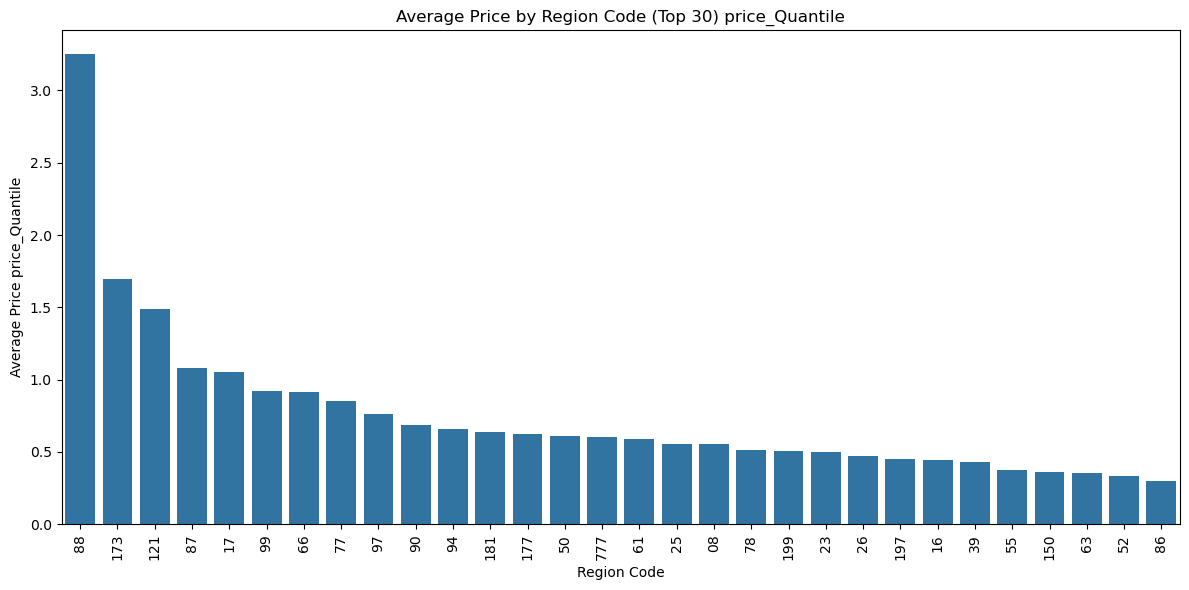

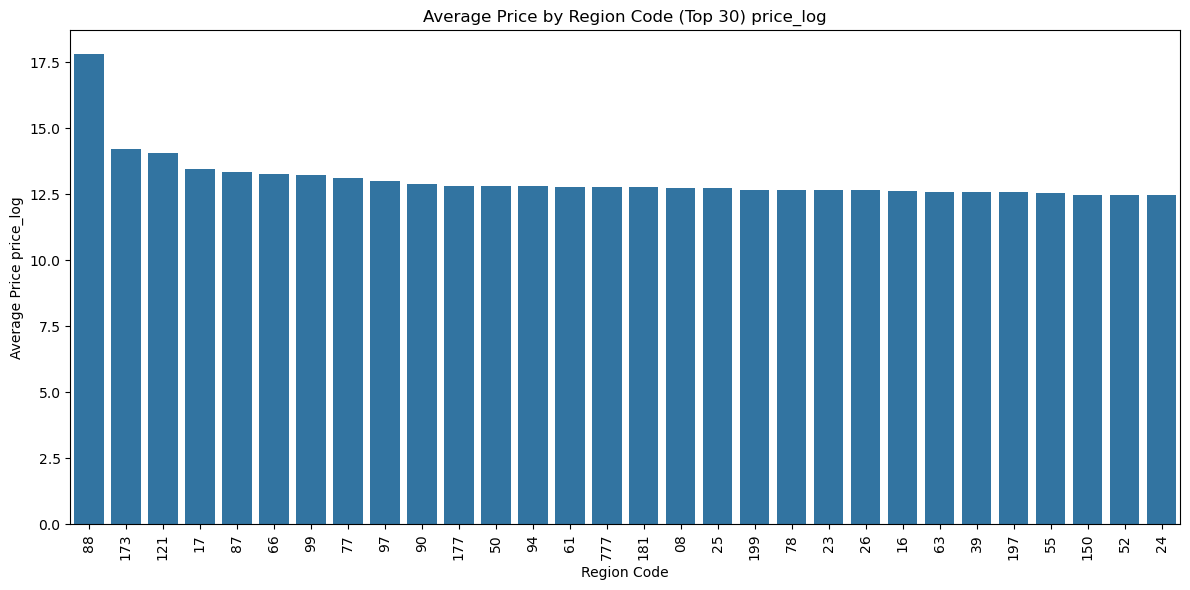

In [44]:
for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(12, 6))
        region_avg_price = df.groupby('region')[transformed_column].mean().sort_values(ascending=False).head(30)
        sns.barplot(x=region_avg_price.index, y=region_avg_price.values)
        plt.title(f'Average Price by Region Code (Top 30) {transformed_column}')
        plt.xticks(rotation=90)
        plt.xlabel('Region Code')
        plt.ylabel(f'Average Price {transformed_column}')
        plt.tight_layout()
        plt.show()

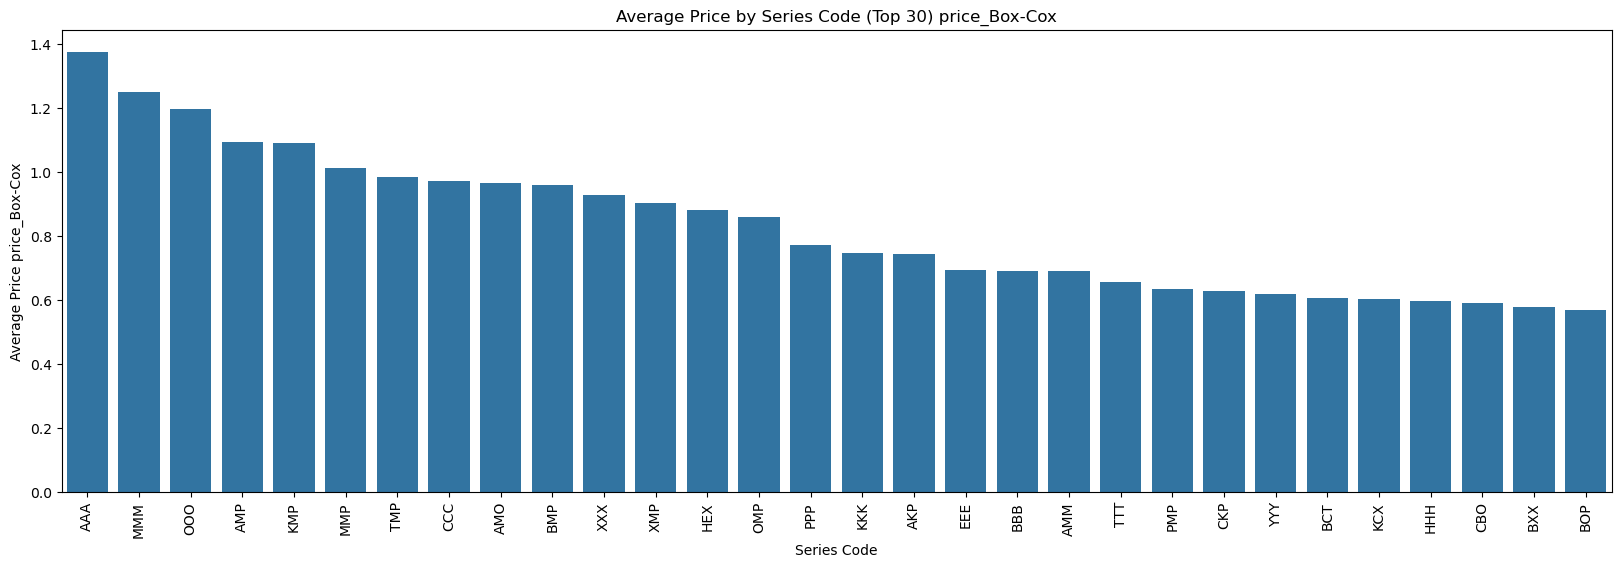

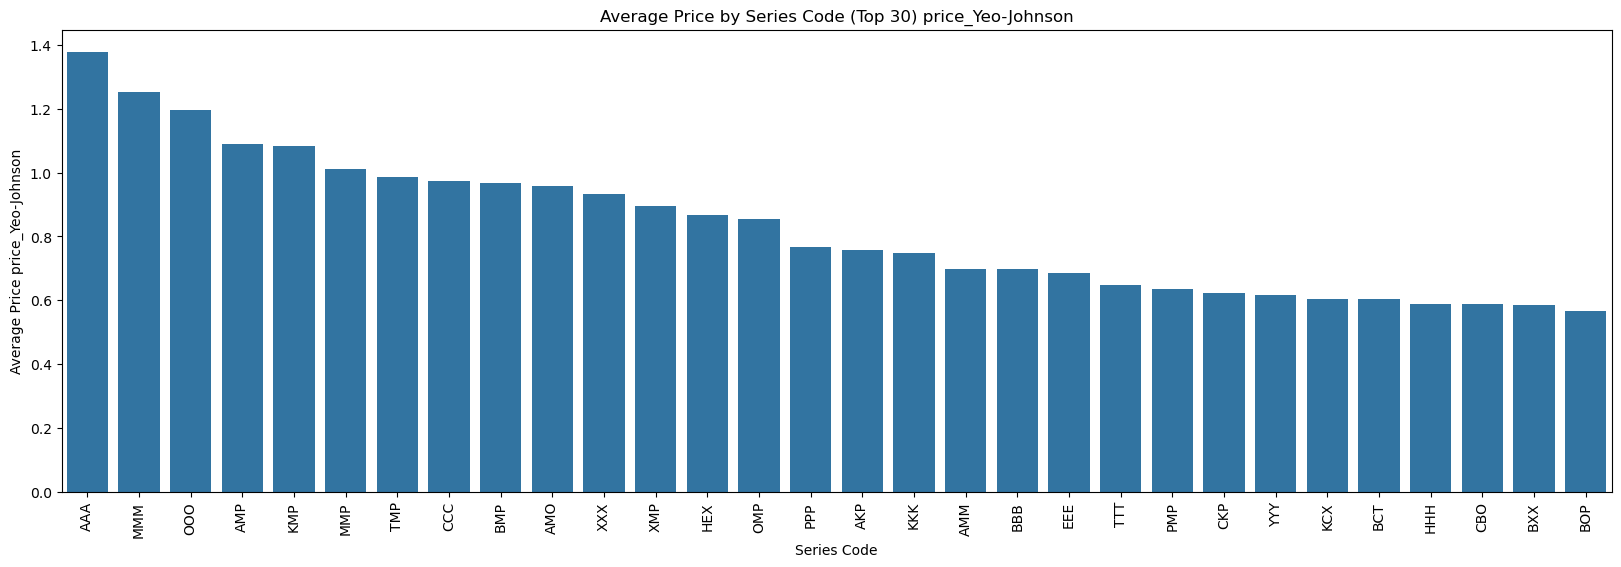

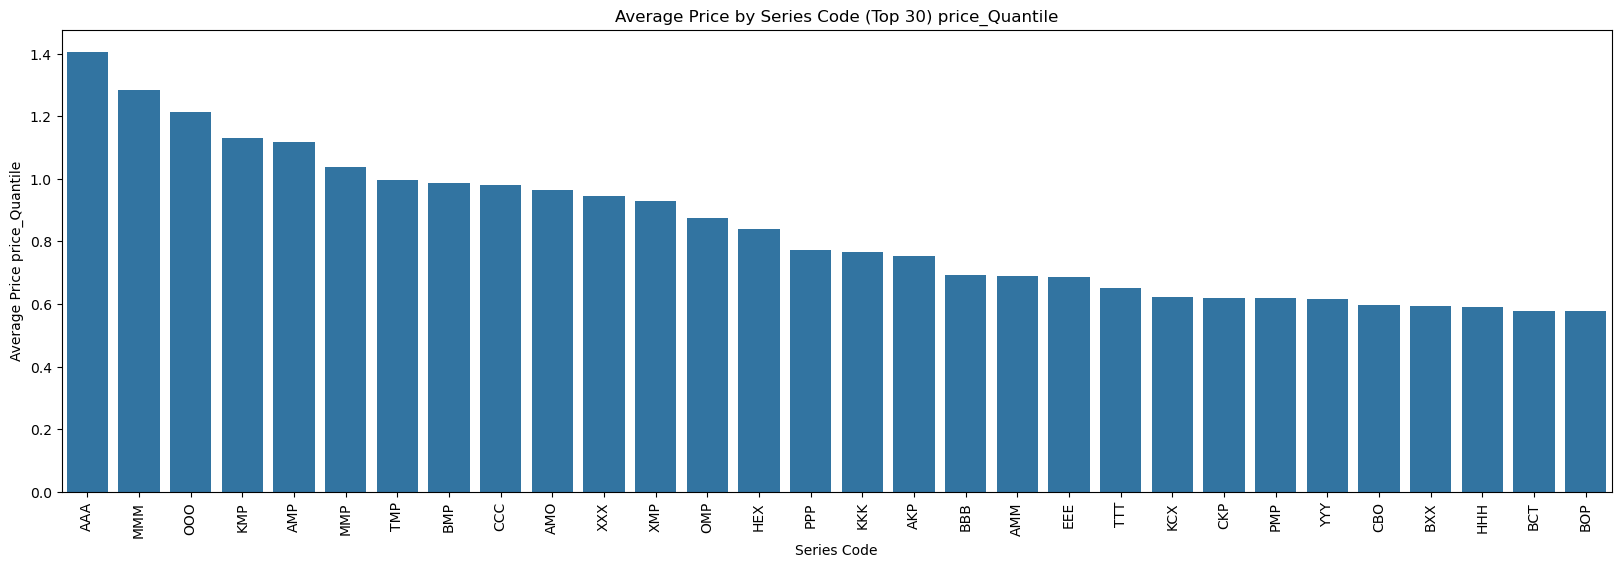

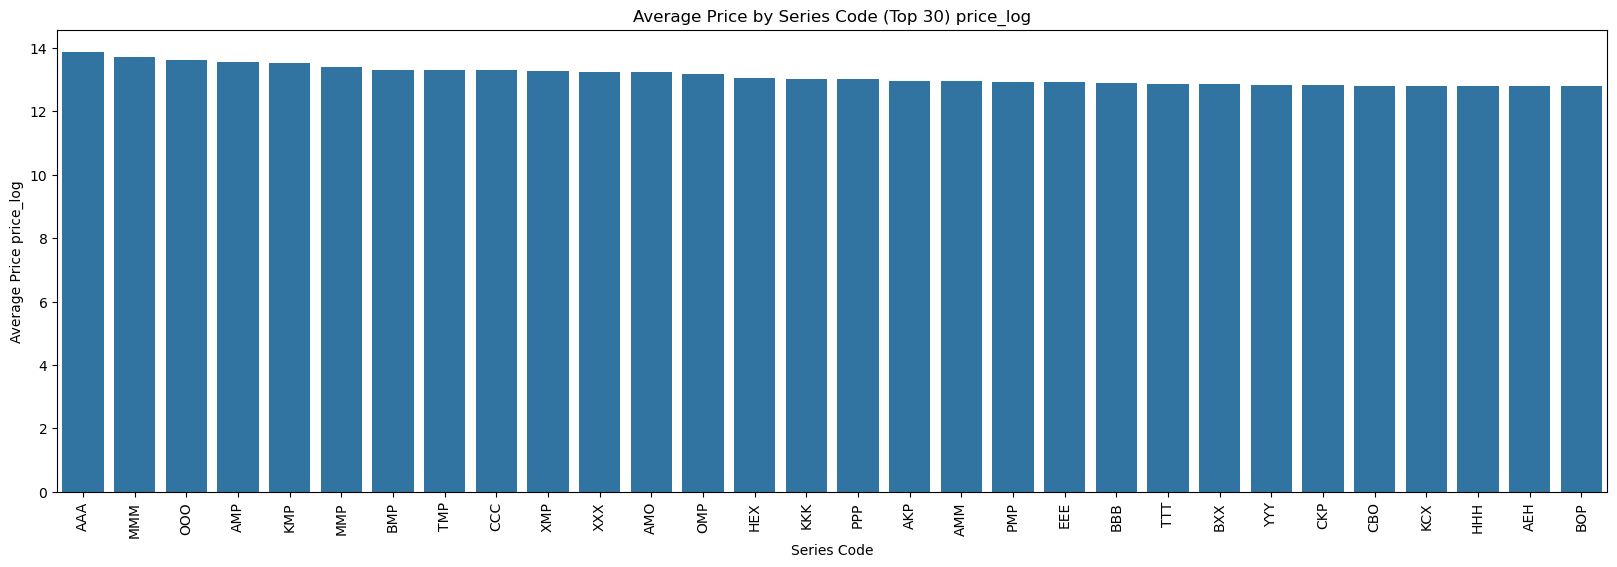

In [45]:
for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(20, 6))
        series_avg_price = df.groupby('series')[transformed_column].mean().sort_values(ascending=False).head(30)
        plt.title(f'Average Price by Series Code (Top 30) {transformed_column}')
        plt.xticks(rotation=90)
        plt.xlabel('Series Code')
        plt.ylabel(f'Average Price {transformed_column}')
        sns.barplot(x = series_avg_price.index, y=series_avg_price.values)

In [46]:
prestigious_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 111, 222, 333, 444, 555, 666, 777, 888, 999,
                       100, 200, 300, 400, 500, 600, 700, 800, 900]
prestigious_letter_series = ["AAA", "MMM", "EEE", "KKK", "OOO", "PPP", "CCC", "TTT", "XXX"]

df["is_prestigious_number"] = df["registration_code"].apply(lambda x: 1 if int(x) in prestigious_numbers else 0)
df["is_prestigious_letter"] = df["series"].apply(lambda x: 1 if x in prestigious_letter_series else 0)

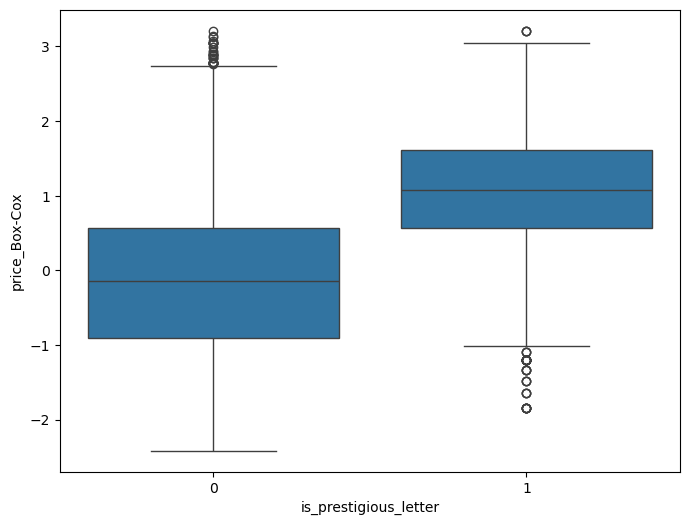

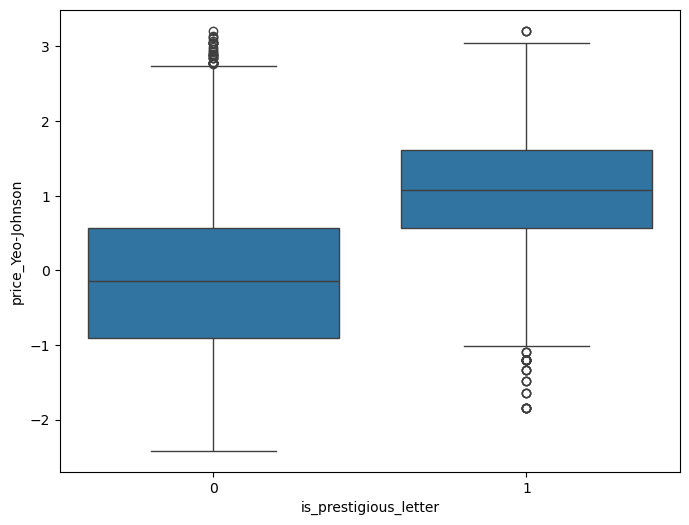

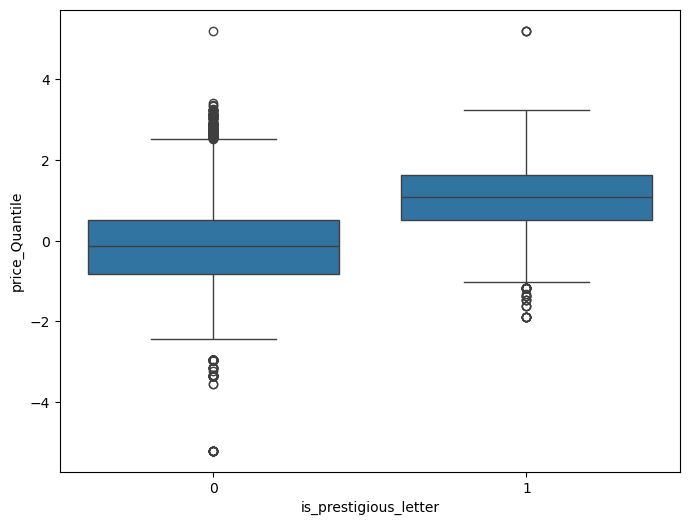

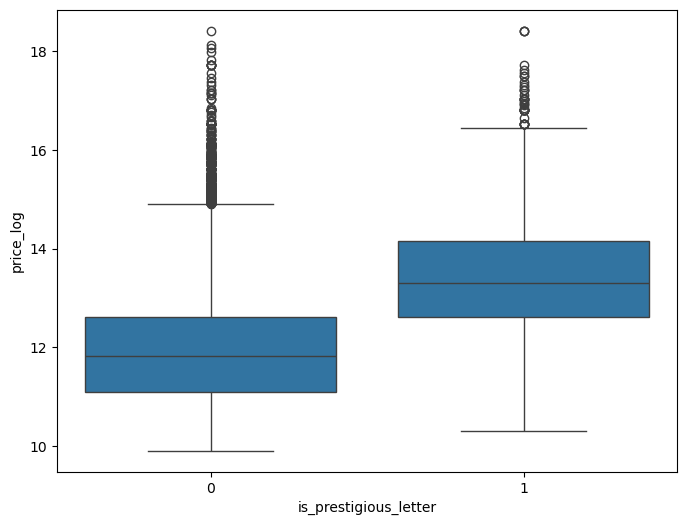

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        plt.figure(figsize=(8,6))
        sns.boxplot(
            data=df,
            x="is_prestigious_letter",
            y=transformed_column
        )
        plt.plot()

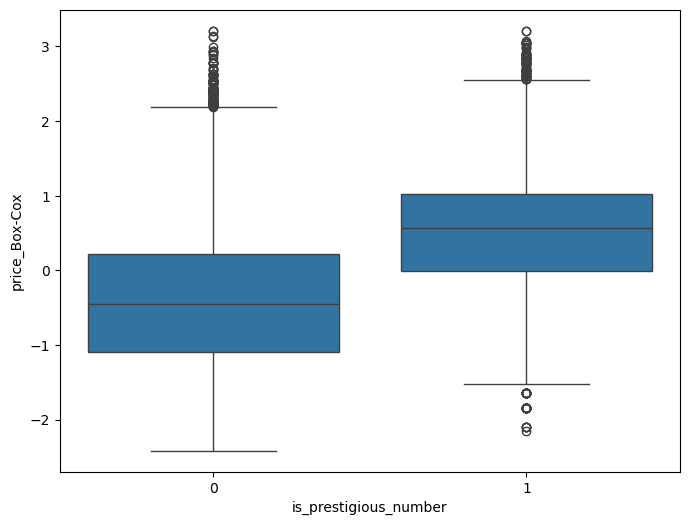

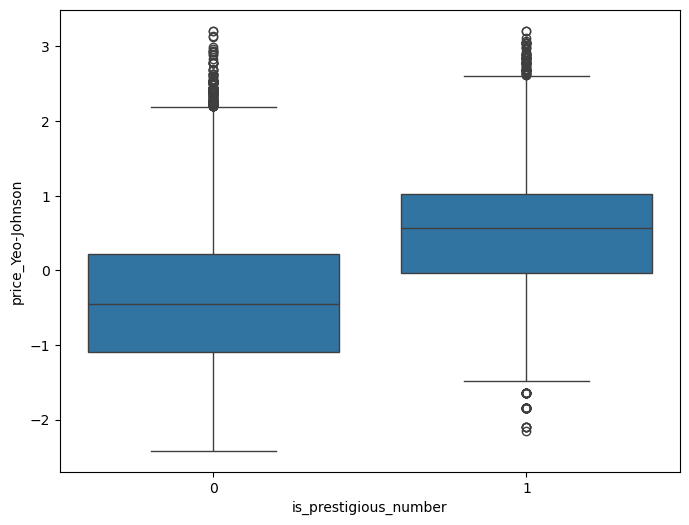

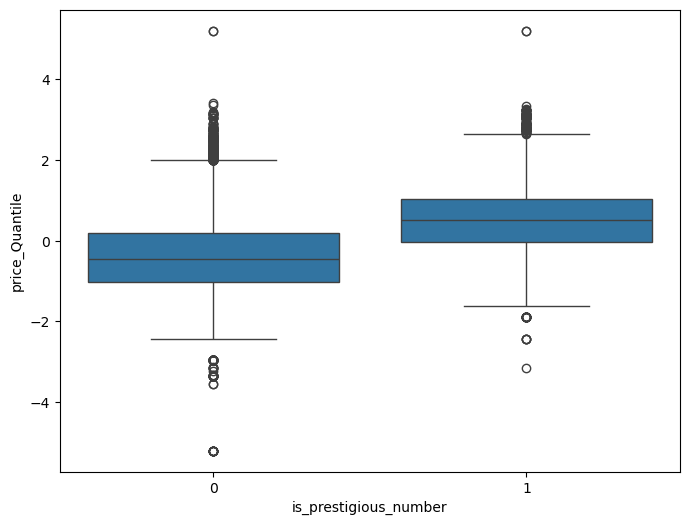

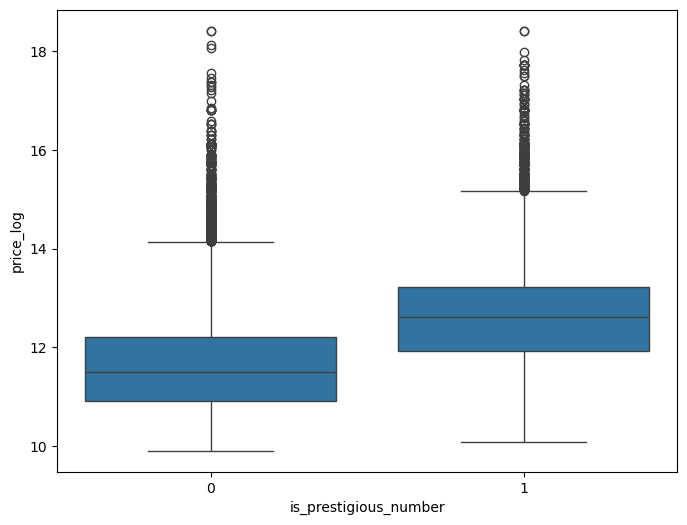

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        plt.figure(figsize=(8,6))
        sns.boxplot(
            data=df,
            x="is_prestigious_number",
            y=transformed_column
        )
        plt.plot()

<Axes: >

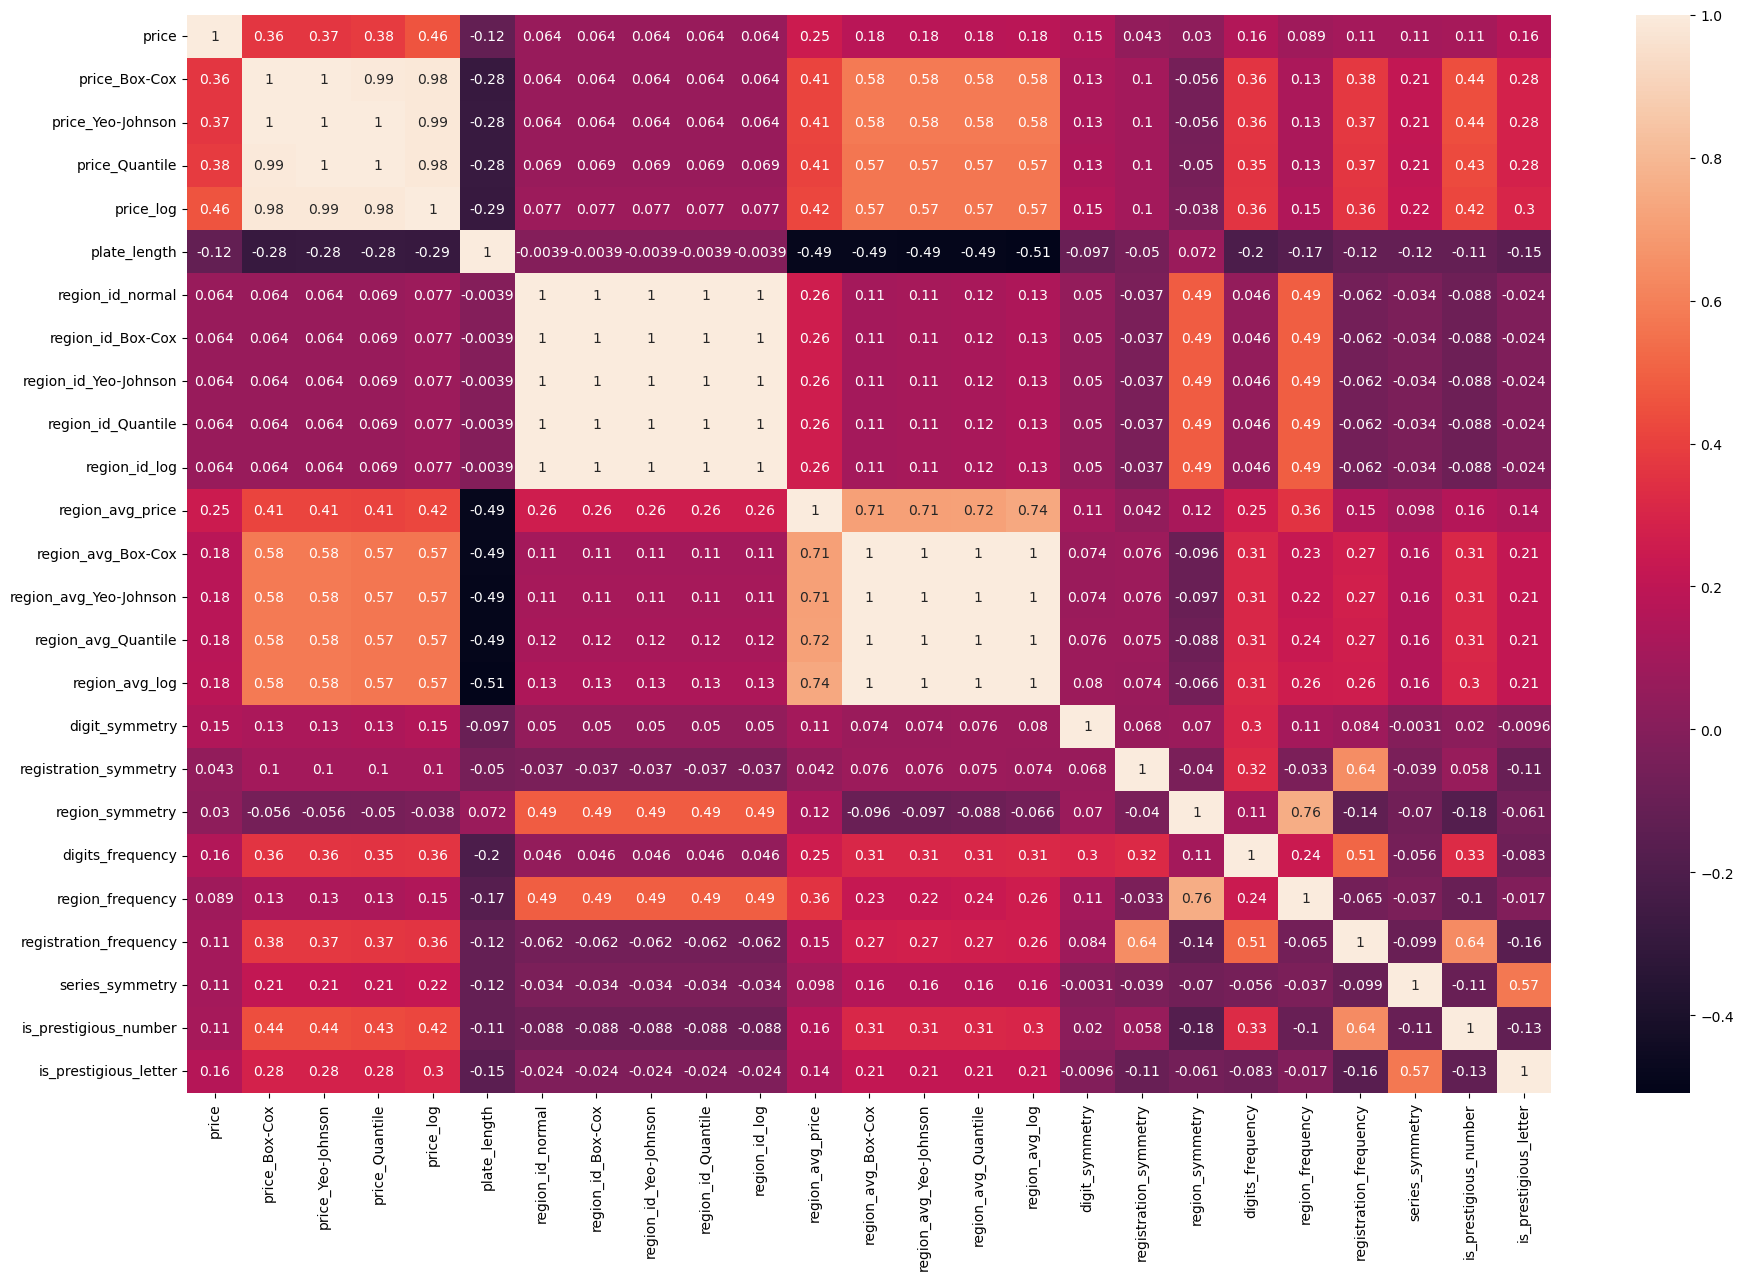

In [49]:
import seaborn as sns

plt.figure(figsize=(22, 14))
corr = df.select_dtypes(['int64', 'float64']).corr(method='pearson')
sns.heatmap(corr, annot=True)

<Axes: >

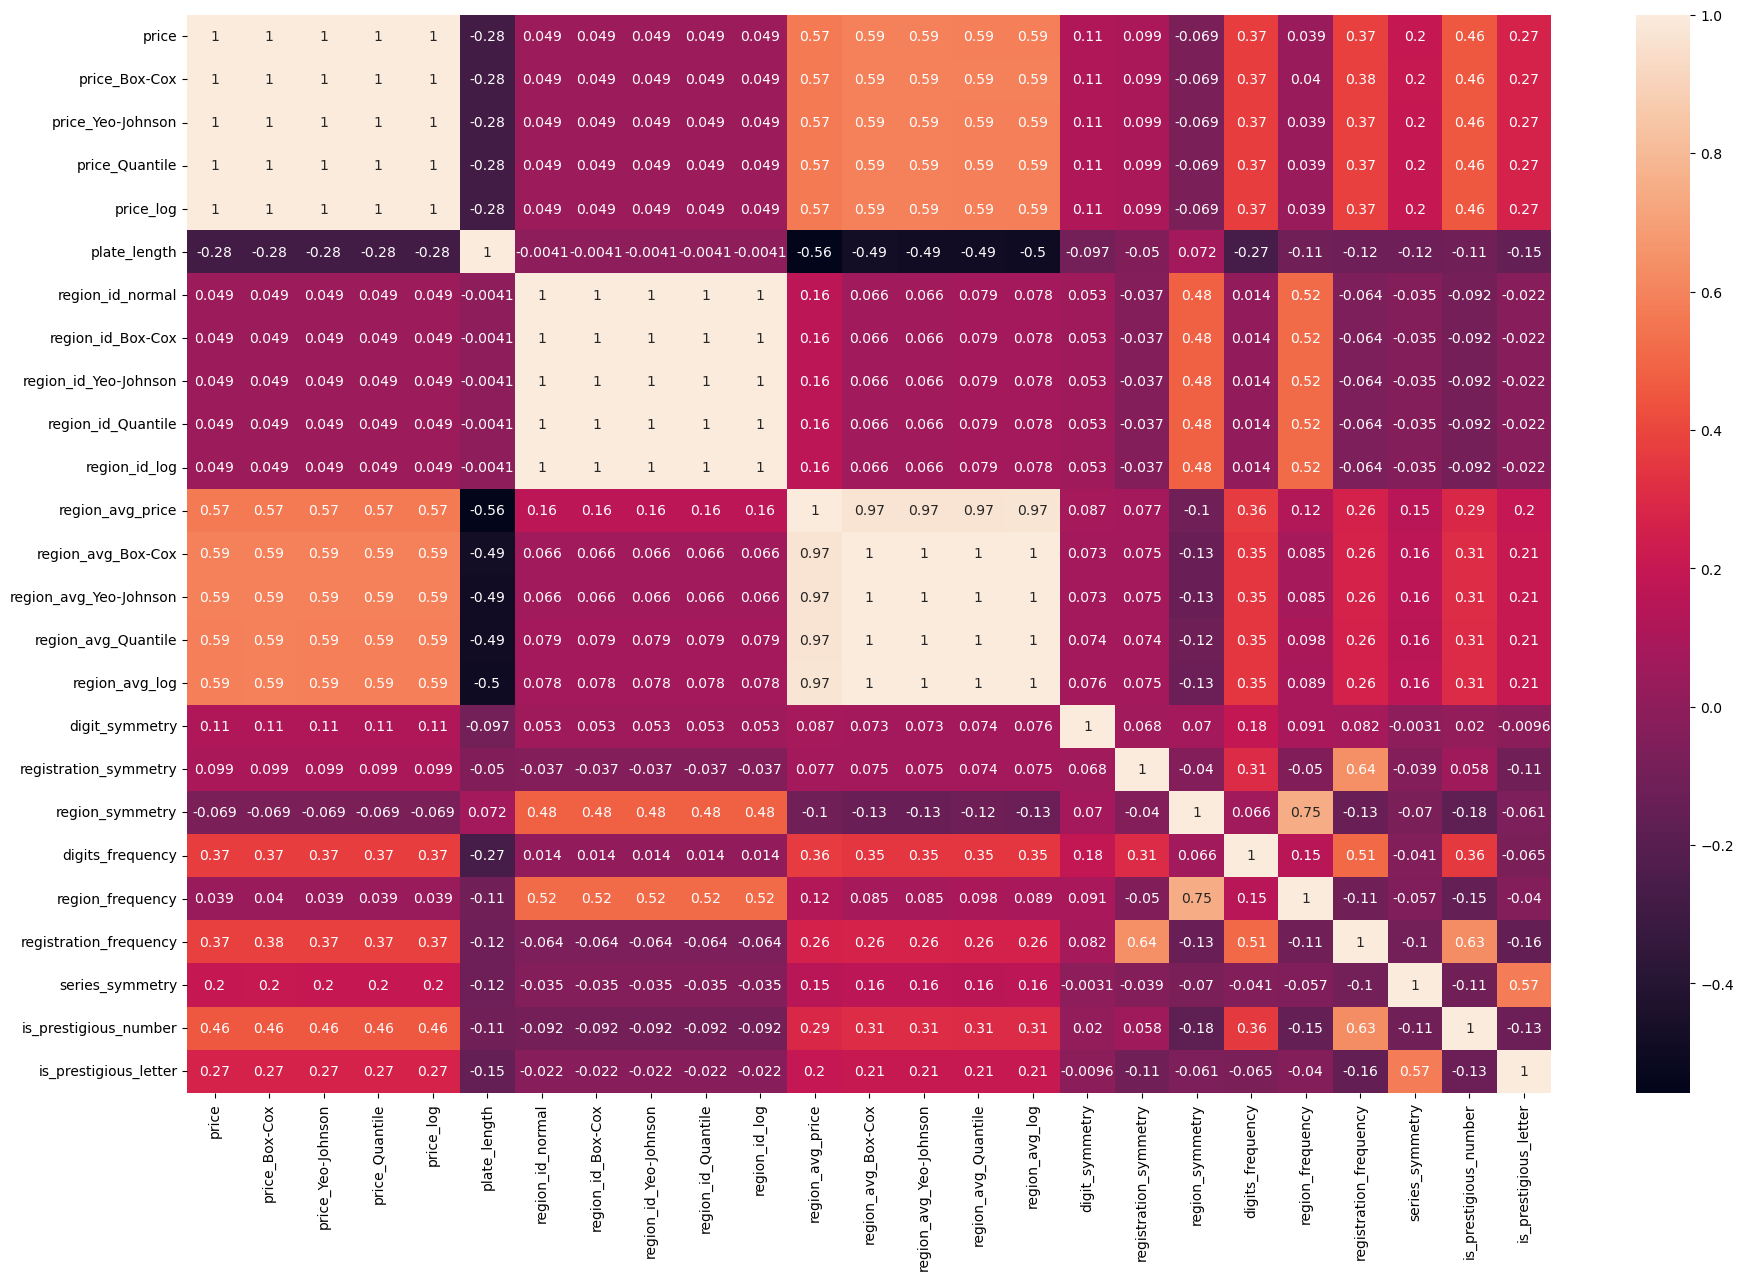

In [50]:
import seaborn as sns

plt.figure(figsize=(22, 14))
corr = df.select_dtypes(['int64', 'float64']).corr(method='spearman')
sns.heatmap(corr, annot=True)

In [51]:
df.columns

Index(['plate', 'date', 'price', 'price_Box-Cox', 'price_Yeo-Johnson',
       'price_Quantile', 'price_log', 'plate_length', 'region',
       'registration_code', 'series_part_1', 'series_part_2', 'series',
       'region_name', 'region_id_normal', 'region_id_Box-Cox',
       'region_id_Yeo-Johnson', 'region_id_Quantile', 'region_id_log',
       'region_avg_price', 'region_avg_Box-Cox', 'region_avg_Yeo-Johnson',
       'region_avg_Quantile', 'region_avg_log', 'digit_symmetry',
       'registration_symmetry', 'region_symmetry', 'digits_frequency',
       'region_frequency', 'registration_frequency', 'series_symmetry', 'year',
       'month', 'day', 'hour', 'day_of_week', 'is_prestigious_number',
       'is_prestigious_letter'],
      dtype='object')

## Encoding

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [54]:
encoded_array = encoder.fit_transform(df[['series_part_1']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['series_part_1']))

df = pd.concat([df.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

In [55]:
encoded_array = encoder.fit_transform(df[['series_part_2']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['series_part_2']))

df = pd.concat([df.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

In [102]:
df.to_csv('feature_extracted_plate.csv')

# Model Implementation

## LightGBM

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz

# Custom SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    # Avoid division by zero issues:
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Custom metric for LightGBM (returns tuple: (eval_name, eval_result, is_higher_better))
def lgb_smape(y_pred, dataset):
    y_true = dataset.get_label()
    return 'SMAPE', smape(y_true, y_pred), False

def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast)) / 2.0
    diff = np.abs(actual - forecast) / denominator
    return 100 * np.mean(diff)

# Custom SMAPE evaluation
def smape_eval(y_pred, y_true):
    y_true = y_true.get_label()
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return 'smape', 100 * np.mean(diff), False

non_important_features = ['price', 'plate', 'date', 'price_transformed',
                          'series_part_1', 'series_part_2', 'series',
                          'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile',
                          'price_log', 'region_name', 'region_id_normal',
                          'region_id_Box-Cox', 'region_id_Yeo-Johnson',
                          'region_id_Quantile', 'region_id_log', 'region_avg_price', 'region_avg_log',
                          'region_avg_Box-Cox', 'region_avg_Yeo-Johnson', 'region_avg_Quantile']

models = {}


for name, transformer in transformers.items():
    important = [f'region_id_{name}', f'region_avg_{name}']
    features_columns = list(set(non_important_features) - set(important))
    features = [col for col in df.columns if col not in features_columns]
    X = df[features].apply(pd.to_numeric)
    y = df[f'price_{name}']
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create LightGBM datasets
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    # Define parameters for LightGBM
    params = {
        'objective': 'regression',
        'metric': 'None',  # We use a custom evaluation metric
        'learning_rate': 0.05,
        'num_leaves': 15,
        'verbose': -1,
        'seed': 42
    }
    
    # Train the model without verbose_eval parameter
    model = lgb.train(
        params,
        train_data,
        num_boost_round=2000,
        valid_sets=[train_data, val_data],
        valid_names=['train', 'valid'],
        feval=smape_eval,
    )
    
    # Predict on validation set and calculate SMAPE
    #y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    #print("Validation SMAPE:", smape(y_val.values, y_pred))
    
    
    # Final SMAPE (on original scale)
    y_pred = model.predict(X_val)
    y_pred_original = transformer.inverse_transform(y_pred.reshape(-1, 1))
    y_val_original = transformer.inverse_transform(y_val.array.reshape(-1, 1))
    
    smape_score = smape(y_val_original.flatten(), y_pred_original.flatten())
    print(f"\nFinal SMAPE on validation set for {name}: {smape_score:.2f}%")
    models[name] = model
    
    # Generate a graph of the first tree using Graphviz
    tree_index = 0  # Change this to visualize other trees
    graph = lgb.create_tree_digraph(model, tree_index=tree_index)
    graph.render("lightgbm_tree", view=True)

/opt/anaconda3/envs/russian-car/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/russian-car/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Box-Cox: 46.58%


/opt/anaconda3/envs/russian-car/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/russian-car/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Yeo-Johnson: 46.78%


/opt/anaconda3/envs/russian-car/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/russian-car/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Quantile: 46.79%


In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    # Avoid division by zero issues:
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def lgb_smape(y_pred, dataset):
    y_true = dataset.get_label()
    return 'SMAPE', smape(y_true, y_pred), False

features = [col for col in df.columns if col not in ['price', 'plate', 'date', 'price_transformed', 'series_part_1', 'series_part_2', 'series', 'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile', 'price_log']]
X = df[features].apply(pd.to_numeric)


params = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 15,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "min_data_in_leaf": 1,
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
    "verbose": -1
}

ValueError: Unable to parse string "Moscow" at position 0

In [ ]:
import optuna

def objective(trial, X_val, y_val, inverse_func):
    num_leaves = trial.suggest_int("num_leaves", 5, 100)
    
    params["num_leaves"] = num_leaves

    model = lgb.train(
        params,
        train_data,
        num_boost_round=500,
        valid_sets=[val_data],
        feval=lgb_smape,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=False)]
    )

    y_pred_log = model.predict(X_val)
    y_pred = inverse_func(y_pred_log.reshape(-1, 1))
    y_val_orig = inverse_func(y_val.array.reshape(-1, 1))
    return smape(y_val_orig, y_pred)


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        transformer_name = transformed_column.split('_')[1]
        if transformer_name == 'log':
            inverse_function = np.expm1
        else:
            inverse_function = transformers[transformer_name].inverse_transform
            
        y = df[f'price_{transformer_name}']
        
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
        
        study = optuna.create_study(direction="minimize")
        
        study.optimize(lambda trial: objective(trial, X_val, y_val, inverse_function), n_trials=20)
        
        print(f"Best num_leaves for {transformer_name}: {study.best_params['num_leaves']}")

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Plot feature importance inside Jupyter Lab
lgb.plot_importance(model, importance_type="gain", figsize=(10, 6))
plt.show()

## XGboost

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import graphviz
import matplotlib.pyplot as plt

# Custom SMAPE function (for post-training evaluation)
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Custom evaluation function for XGBoost
# It transforms predictions back to the original scale using np.expm1
def xgb_smape_eval(preds, dtrain):
    labels = dtrain.get_label()
    labels_orig = np.expm1(labels)
    preds_orig = np.expm1(preds)
    denominator = (np.abs(labels_orig) + np.abs(preds_orig)) / 2.0
    diff = np.abs(labels_orig - preds_orig) / denominator
    diff[denominator == 0] = 0.0
    smape_val = np.mean(diff) * 100
    return 'smape', smape_val

# Assuming df is your DataFrame and 'price_transformed' is the log-transformed target
features = [col for col in df.columns if col not in ['price', 'plate', 'date', 'price_transformed', 'series_part_1', 'series_part_2', 'series', 'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile', 'price_log', 'region_name']]
X = df[features].apply(pd.to_numeric)
y = df['price_log']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eta': 0.05,
    'max_depth': 15,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'lambda': 0.1,
    'alpha': 0.1,
    'seed': 42,
    'verbosity': 0
}

evals = [(dval, 'eval')]

# Train the model with early stopping and custom SMAPE evaluation
model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

# Predict on validation set (using the best iteration) and compute SMAPE on original scale
y_pred_log = model.predict(dval)
y_pred = np.expm1(y_pred_log)
y_val_orig = np.expm1(y_val)
smape_score = smape(y_val_orig, y_pred)
print(f"\nFinal SMAPE on validation set: {smape_score:.2f}%")

[0]	eval-rmse:1.12509
[1]	eval-rmse:1.09085
[2]	eval-rmse:1.05965
[3]	eval-rmse:1.02881
[4]	eval-rmse:1.00038
[5]	eval-rmse:0.97576
[6]	eval-rmse:0.95099
[7]	eval-rmse:0.92920
[8]	eval-rmse:0.90748
[9]	eval-rmse:0.88764
[10]	eval-rmse:0.86880
[11]	eval-rmse:0.85224
[12]	eval-rmse:0.83830
[13]	eval-rmse:0.82352
[14]	eval-rmse:0.80960
[15]	eval-rmse:0.79682
[16]	eval-rmse:0.78543
[17]	eval-rmse:0.77583
[18]	eval-rmse:0.76560
[19]	eval-rmse:0.75617
[20]	eval-rmse:0.74804
[21]	eval-rmse:0.73956
[22]	eval-rmse:0.73245
[23]	eval-rmse:0.72534
[24]	eval-rmse:0.71949
[25]	eval-rmse:0.71379
[26]	eval-rmse:0.70845
[27]	eval-rmse:0.70401
[28]	eval-rmse:0.69989
[29]	eval-rmse:0.69597
[30]	eval-rmse:0.69198
[31]	eval-rmse:0.68856
[32]	eval-rmse:0.68520
[33]	eval-rmse:0.68208
[34]	eval-rmse:0.67954
[35]	eval-rmse:0.67690
[36]	eval-rmse:0.67438
[37]	eval-rmse:0.67221
[38]	eval-rmse:0.67002
[39]	eval-rmse:0.66821
[40]	eval-rmse:0.66621
[41]	eval-rmse:0.66447
[42]	eval-rmse:0.66315
[43]	eval-rmse:0.6616

## LazyPredict

In [53]:
transformers

{'Box-Cox': PowerTransformer(method='box-cox'),
 'Yeo-Johnson': PowerTransformer(),
 'Quantile': QuantileTransformer(output_distribution='normal')}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Custom SMAPE function (expects y_true and y_pred as 1D arrays)
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    # Avoid division by zero
    diff = np.abs(y_true - y_pred) / np.where(denominator == 0, 1, denominator)
    return np.mean(diff) * 100

# List of non-important features as defined in your original code
non_important_features = [
    'price', 'plate', 'date', 'price_transformed',
    'series_part_1', 'series_part_2', 'series',
    'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile',
    'price_log', 'region_name', 'region_id_normal',
    'region_id_Box-Cox', 'region_id_Yeo-Johnson',
    'region_id_Quantile', 'region_id_log', 'region_avg_price', 'region_avg_log',
    'region_avg_Box-Cox', 'region_avg_Yeo-Johnson', 'region_avg_Quantile'
]

# Assume `df` is your DataFrame and `transformers` is a dictionary of transformer objects
# with keys corresponding to the names (e.g., different transformation methods).

results = {}
models_dict = {}

for name, transformer in transformers.items():
    if name == "Box-Cox":
        # Determine the important features for this transformer
        important = [f'region_id_{name}', f'region_avg_{name}']
        features_columns = list(set(non_important_features) - set(important))
        # Select features (all columns not in features_columns)
        features = [col for col in df.columns if col not in features_columns]
        
        # Convert features to numeric if necessary
        X = df[features].apply(pd.to_numeric)
        y = df[f'price_{name}']
        
        # Train-test split
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Initialize LazyRegressor with the custom SMAPE metric
        reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=smape)
        models, predictions = reg.fit(X_train, X_val, y_train, y_val)
        
        # Print the LazyPredict summary for the current transformer
        print(f"\nLazy Predict results for {name}:")
        print(predictions)
        
        # Optionally, choose one of the models to generate final predictions.
        # Here we select the model with the lowest SMAPE from the LazyPredict results.
        best_model_name = predictions['SMAPE'].idxmin()
        best_model = models[best_model_name]
        
        # Generate predictions on the validation set
        y_pred = best_model.predict(X_val)
        
        # Inverse-transform the predictions and true values back to the original scale
        y_pred_original = transformer.inverse_transform(y_pred.reshape(-1, 1))
        # Ensure y_val is reshaped appropriately (using .values for pandas Series)
        y_val_original = transformer.inverse_transform(y_val.values.reshape(-1, 1))
        
        # Calculate final SMAPE on the original scale
        final_smape = smape(y_val_original.flatten(), y_pred_original.flatten())
        print(f"\nFinal SMAPE on validation set for {name} using {best_model_name}: {final_smape:.2f}%")
        
        # Store results if needed later
        results[name] = {
            "predictions": predictions,
            "final_smape": final_smape,
            "best_model": best_model_name
        }
        models_dict[name] = best_model

  0%|          | 0/42 [00:00<?, ?it/s]